# **LearnAFE: A Learnable Analog Front-End for Keyword Spotting**

| Name                    | Affiliation                                                                                          | IEEE Member | SSCS Member |
|:-----------------------:|:----------------------------------------------------------------------------------------------------:|:-----------:|:-----------:|
| Jinhai Hu               | Nanyang Technological University, Singapore; <br /> Institute of Microelectronics, A*STAR, Singapore | Yes         | Yes         |
| Zhongyi Zhang           | Nanyang Technological University, Singapore; <br /> Institute of Microelectronics, A*STAR, Singapore | Yes         | Yes         |
| Cong Sheng Leow         | University of Michigan, USA; <br /> A*STAR, Singapore                                                | Yes         | Yes         |
| Wang Ling Goh (Advisor) | Nanyang Technological University, Singapore                                                          | Yes         | Yes         |
| Yuan Gao (Advisor)      | Institute of Microelectronics, A*STAR, Singapore                                                     | Yes         | Yes         |

## Abstract

This project presents a circuit-algorithm co-design of a learnable audio analog front-end (AFE) for Keyword Spotting (KWS). Instead of the traditional approach where the AFE for feature extraction is designed separately from the classifier design, this project showcase the inclusion of the AFE design within the neural network classifier training and verification loop. More specifically, the transistors' transconductance ($g_m$) and capcitances in a differential super source-follower bandpass filter (DSSF-BPF or DSF-BFF) are considered in the SNR-aware training of the Depthwise Separable Convolutional Neural Network (DSCNN) for KWS. This involves a new system-level loss function, ($L_{BPF}$), to include both the classifier and filter performance to achieve a system-level optimal. The availbility of open-source process development kit (PDK) and circit design tools such as ngspice enable this synergistic approach of training a classifier together with its feature extractor. Using sky130, the proposed framework achieved a DSSF-BPF capable of achieving $>90\%$ KWS accuracy through a DSCNN with verification of the filter performance through SPICE.

<hr style="border:2px solid grey">

## Introduction

This repository contains the code of circuit-algorithm co-design for learnable audio analog front-end. 

Always-on keyword spotting (KWS) is an emerging human-machine interface for mobile and Internet of Things (IoT) devices. Key performance metrics for KWS module include classification accuracy and power consumption. Feature extraction (FEx) is a pivotal function in KWS system. The use of analog FEx based on bandpass filterbank offers the advantage of higher energy efficiency compared to its digital counterpart, which requires analog-to-digital conversion (ADC) [[1]](#ref1). However, analog FEx also faces the challenges such as channel overlapping, gain variation, and large on-chip capacitors [[2]](#ref2). Conventional filterbank design follows Mel frequency scale with uniform filter gain across all channels. However, achieving this result requires larger bias current to boost the transistor transconductance ($g_m$) for those high frequency channels.

Inspired by the recent work on learnable digital filter [[3]](#ref3), this project introduces a circuit-algorithm co-design framework for learnable audio analog front-end. The analog circuit parameters of a differential super source-follower bandpass filter (DSSF-BPF or DSF-BFF) filterbank are optimized together with the neural network classifier in a signal-to-noise ratio (SNR)-aware training process for optimal system-level performance.


<hr style="border:2px solid grey">

## Architecture

This project proposes a closed-loop training and verification flow in designing a learnable AFE for KWS spotting. Within the training loop as shown in the figure below, the NN-based classifier is trained for KWS spotting with actual AFE's transfer function, drawing inspiration from [[4]](#ref4). By incorporating the parameters of the AFE in the training process, the AFE is optimized with the KWS spotting results during each training iteration.

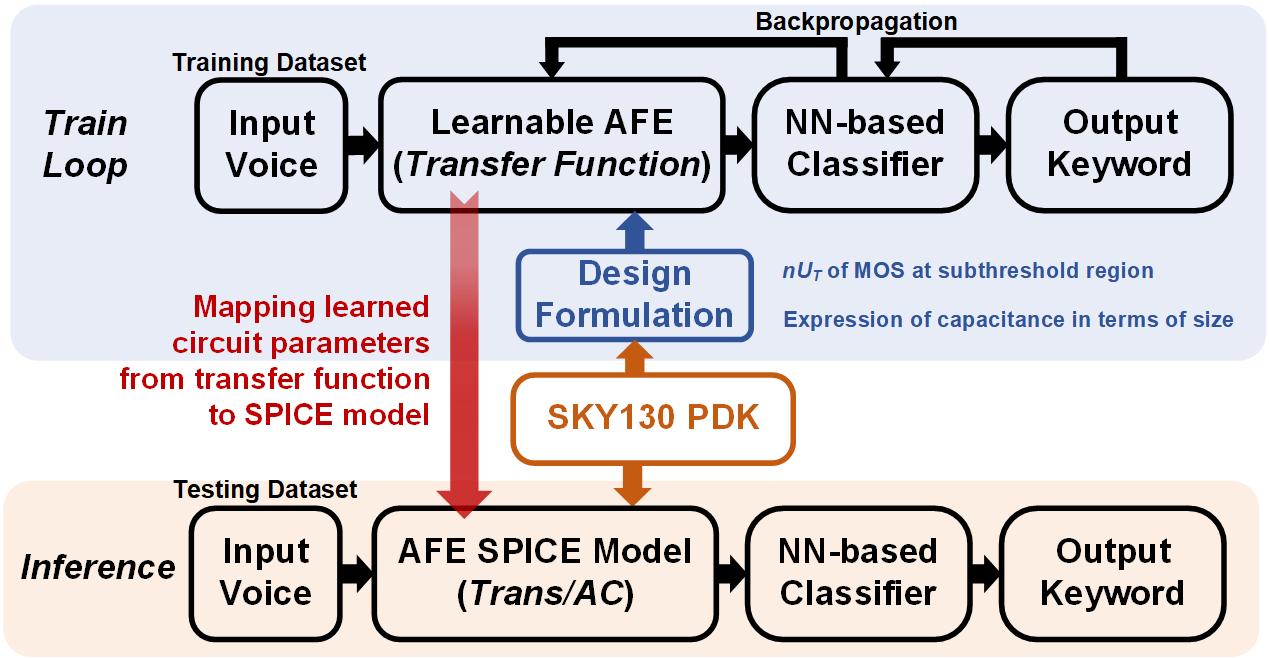

The following diagram shows the architecture of the proposed learnable audio AFE and the schematic of the super source-follower bandpass filter (SSF-BPF). The DSSF-BPF is strategically adopted for its diverse adjustability, exceptional adaptability, and efficiency. Voice signal from microphone goes through FEx to extract the channel energy and convert to digital features for classification. A depthwise separable CNN (DSCNN) network is used for 12-classes classification. Each FEx channel comprises a tunable SSF-BPF and a spectrogram generator. The spectrogram generated is then processed using a half-wave rectifier (HWR) and integrate-and-fire (IAF) layer before the classifer, removing the need for a ADC [[2]](#ref2). The schematic of the 2nd-order DSSF-BPF is shown in the bottom of the following figure. Transistors $M_{1,2}$ and $M_{3,4}$ serve as the super source-followers, and floating capacitors $C_{1,2}$ determine the pole locations. The transistor transconductance for $M_{1,2}$ can be expressed in [(1)](#eq1) and [(2)](#eq2), where $n$ is subthreshold slope factor, and $U_T$ is thermal voltage at room temperature. 

<a id="eq1"></a>
\begin{equation} 
  g_{m1}=\frac{I_2}{(nU_T)_{PMOS}}
\tag{1}
\end{equation} 

<a id="eq2"></a>
\begin{equation} 
  g_{m2}=\frac{I_1 - I_2}{(nU_T)_{NMOS}}
\tag{2}
\end{equation} 

Through small signal model analysis, neglecting body effects, the filter transfer function $H(s)$, central frequency $f_c$, quality factor $Q$ and passband gain $A$ can be derived as shown in [(3)](#eq3) - [(6)](#eq6). Transfer function [(3)](#eq3) reveals that all parameters ($g_{m1}$, $g_{m2}$, $C_1$, $C_2$) within this structure can be individually adjusted. Operating in the subthreshold region, the DSSF-BPF utilizes the capability to modulate $g_m$ through external current adjustments, along with the ability to finely tune in-chip capacitors, thus conveniently regulating gain, center frequency, and Q-factor. 

<a id="eq3"></a>
\begin{equation} 
  H(s)=-\frac{\frac{g_{m1}}{2C_1}s}{s^2 + \frac{g_{m1}}{2C_2}s + \frac{g_{m1}g_{m2}}{4C_1C_2}}
\tag{3}
\end{equation} 

<a id="eq4"></a>
\begin{equation} 
  f_c=\frac{1}{4\pi}\sqrt{\frac{g_{m2}g_{m1}}{C_1C_2}}
\tag{4}
\end{equation} 

<a id="eq5"></a>
\begin{equation} 
  Q=\sqrt{\frac{g_{m2}C_2}{g_{m1}C_1}}
\tag{5}
\end{equation} 

<a id="eq6"></a>
\begin{equation} 
  A=\frac{C_2}{C_1}
\tag{6}
\end{equation} 

It can be observed that the key performance of each DSSF-BPF can be largely defined by 4 circuit parameters ($g_{m1}, g_{m2}, C_1, C_2$). These parameters are included in the system training process using back propagation. The initial circuit values are based on the reference design in SPICE circuit simulation. The trained values are feedback to update the circuit parameters. Instead of just achieving local optimums when optimizing the FEx front-end and classification back-end separately, the proposed approach seeks to achieve global optimum including both front-end and back-end.

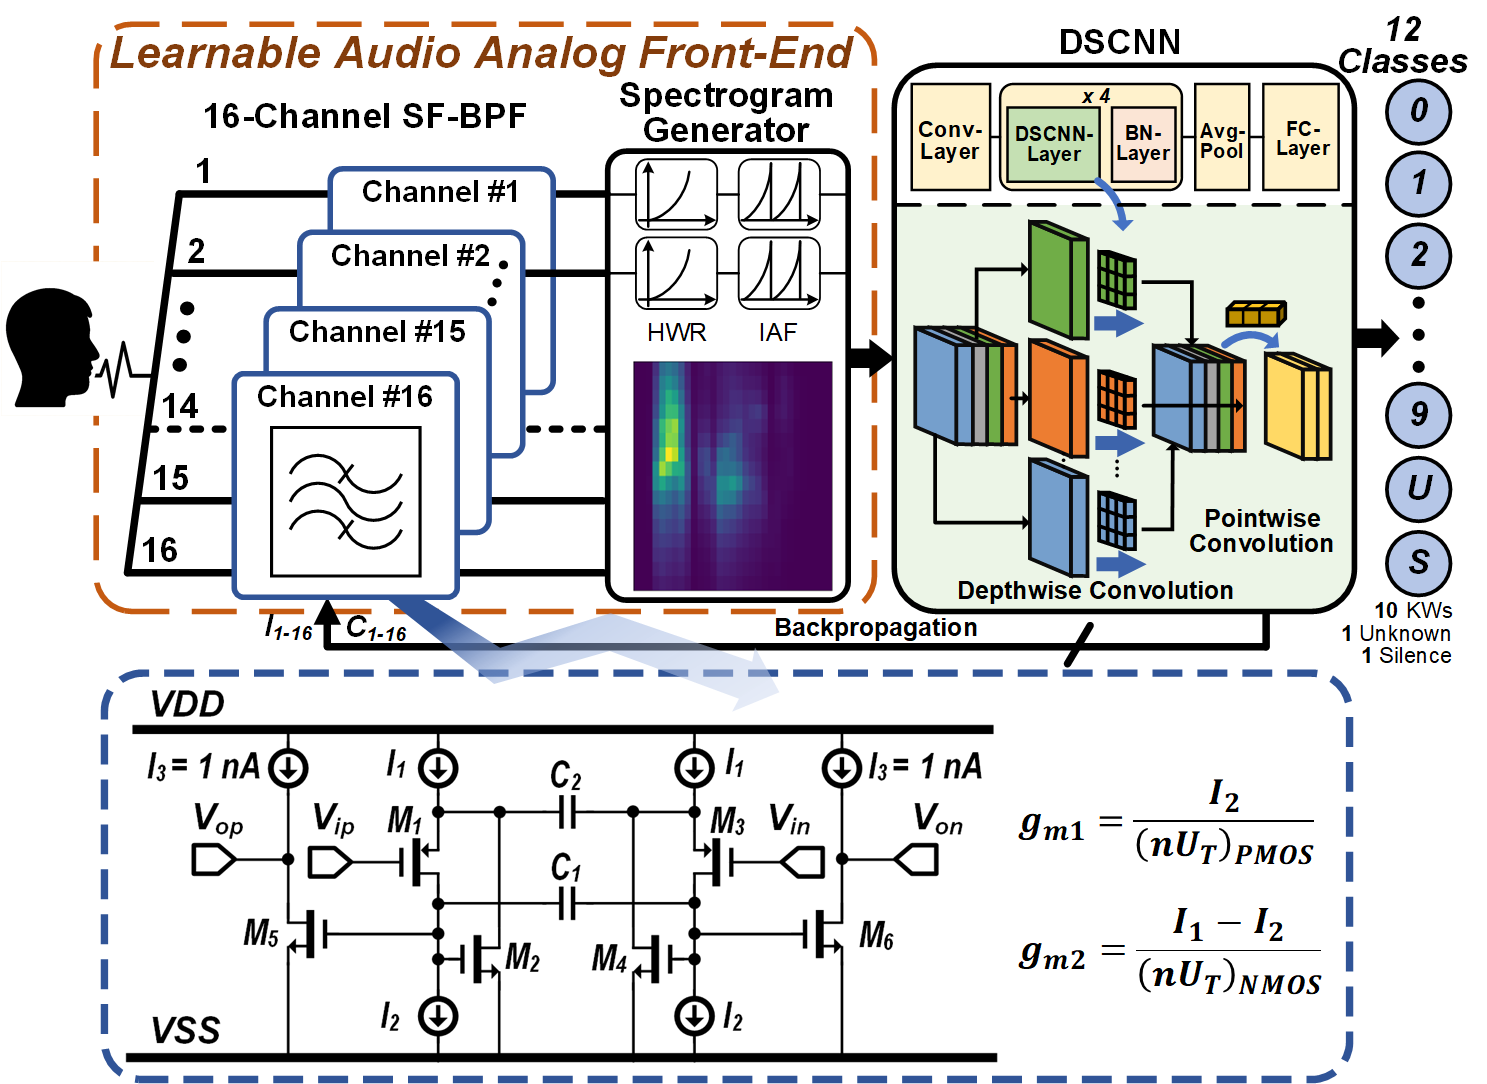

<hr style="border:2px solid grey">

## Design Formulation

The learnable AFE is formulated from open-source sky130 pdk [[5]](#ref5). For each AFE channel, $g_{m1}$, $g_{m2}$, $C_1$, $C_2$ can be formulated with the current $I_1$ and $I_2$, and the capacitor size $W_{C1}$ and $W_{C2}$.

The transistor transconductance ($g_m$) is the first order deviation of drain current ($I_d$) with respect to Gate-Source Voltage($V_{gs}$), as shown in [(7)](#eq7) and [(8)](#eq8). 

<a id="eq7"></a>
\begin{equation} 
  I_d=I_{d0}\frac{W}{L}\exp(\frac{V_{gs}-V_{th}}{nU_T})
\tag{7}
\end{equation} 

<a id="eq8"></a>
\begin{equation} 
  g_m=\frac{I_d}{nU_T}
\tag{8}
\end{equation} 

Equation [(1)](#eq1) and [(2)](#eq2) give the expression between $g_{m1,2}$ and $I_{1,2}$. In this project, $(nU_T)_{NMOS}=0.038$ and $(nU_T)_{PMOS}=0.059$ are adopted using regression analysis.

The capacitance $C$ can be expressed in [(9)](#eq9) in terms of side length of capacitor $W_C$ and $L_C$ (extracted from sky130 pdk). By considering the $W/L$ of each capacitor is 1, $W_C$ = $L_C$ is used in this project, as shown in [(10)](#eq10).

<a id="eq9"></a>
\begin{equation} 
  C=(W_C \times L_C) \times 2 \times 10^{-3} + (W_C+L_C) \times 0.38 \times 10^{-3}
\tag{9}
\end{equation} 

<a id="eq10"></a>
\begin{equation} 
  C=(W_C)^2 \times 2 \times 10^{-3} + W_C \times 0.76 \times 10^{-3}
\tag{10}
\end{equation}

The optimization boundaries such as $f_c$ spans from 100 Hz to 5k Hz. It should be noted that some filter parameters such as $I_{1,2}$ and $W_{C1,2}$ may have huge value difference up to the order of $10^3$ or even more. Such differences complicate training due to its impact on the learning rates and potentially leading to vanishing gradient. To address this issue, two trainable scaling factors ($\phi_I$ and $\phi_C$) are introduced in [(11)](#eq11). Both factors are scalable in real circuit design. This approach enables a flexible and realistic representation of capacitance values. Boundaries for $\phi_I$ and $\phi_C$ are imposed during training ($\phi_I > 1$ and $\phi_C > 1$) to ensure the optimization result does not violate circuit theory. 

<a id="eq11"></a>
\begin{equation} 
  \phi_I = \frac{I_1}{I_2} \quad \phi_C=\frac{C_2}{C_1}
\tag{11}
\end{equation} 

Furthermore, $\phi_C$ can be expressed using the size of capacitors, shown in [(12)](#eq12).

<a id="eq12"></a>
\begin{equation} 
  \phi_C=\frac{C_2}{C_1}=\frac{(W_{C2})^2 \times 2 \times 10^{-3} + W_{C2} \times 0.76 \times 10^{-3}}{(W_{C1})^2 \times 2 \times 10^{-3} + W_{C1} \times 0.76 \times 10^{-3}}
\tag{12}
\end{equation} 

The corresponding $g_{m1,2}$ used for transfer function [(3)](#eq3) can be expressed in terms of $I_2$, $\phi_I$, $(nU_T)_{NMOS}$ and $(nU_T)_{PMOS}$, as listed in [(13)](#eq13) and [(14)](#eq14). As $g_m$ of a transistor is difficult to tune directly when the hardware is fabricated, we use the current $I_{1,2}$ to change the filter's performance as they can be controlled with external current sources.

<a id="eq13"></a>
\begin{equation} 
  g_{m1}=\frac{I_2}{(nU_T)_{PMOS}}
\tag{13}
\end{equation}

<a id="eq14"></a>
\begin{equation} 
  g_{m2}=(\phi_I - 1) \times g_{m1} \frac{(nU_T)_{PMOS}}{(nU_T)_{NMOS}}
\tag{14}
\end{equation}

The intial parameters for AFE configuration are listed in the table below (corresponding to `AFE_Config/Design/DSF16.txt`). 

\begin{array}{|c|c|c|}
\hline
 Parameter & Initial  \ Value & Notes\\
\hline
W_{C1} & 22 \ \mu m & same \ for \ 16 \ channels\\
\hline
W_{C2} & 60 \ \mu m & same \ for \ 16 \ channels\\
\hline
I_1 & 300 \ pA & current \ I_1 \ for \ channel \ 1\\
\hline
I_2 & 100 \ pA & current \ I_2 \ for \ channel \ 1\\
\hline
scale & 1.298 & current \ ratio \ for \ \frac{channel \ (n+1)}{channel \ (n)}\\
\hline
\end{array}

Thus, the initial value of $\phi_I$ for 16 channels is `tensor([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.], requires_grad=True)` and of $\phi_C$ for 16 channels is `tensor([7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580,7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580, 7.3580], requires_grad=True)`. These scaling factors represent the ratio of two coupled parameters, allowing for more balanced updates during the training process. The freauency response with these initial values is shown in following figure.

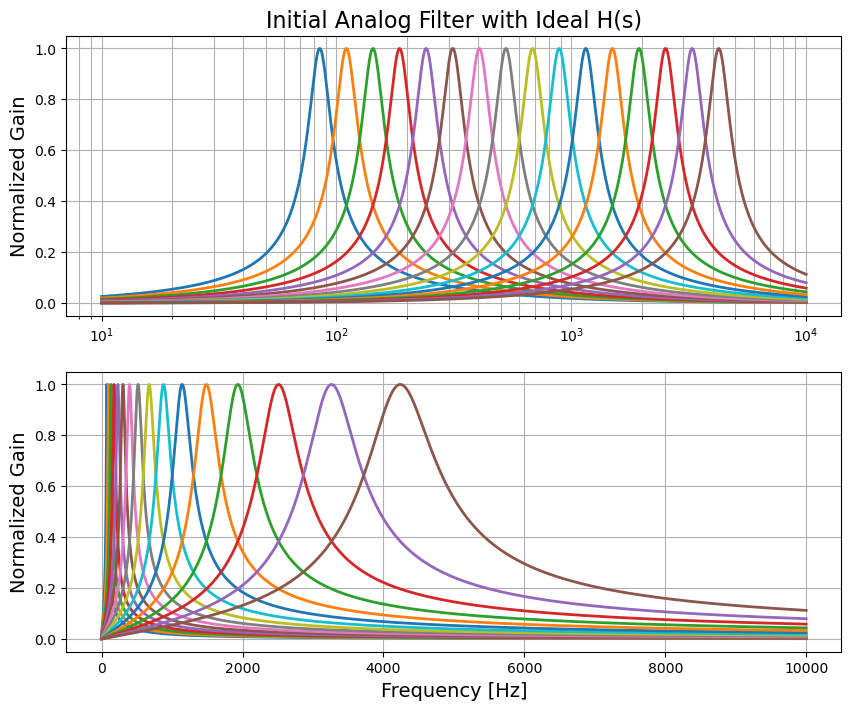



To optimize algorithm and circuit performance concurrently, we introduce a new loss function, $L_{BPF}$, as a more effective system criterion (loss function) for co-design optimization. In addition to the cross-entropy loss ($L_{CE}$) for KWS classification, power loss ($L_P$) and area loss ($L_A$) are incorporated into $L_{BPF}$ to collectively minimize during training. As depicted in [(15)](#eq15), $L_P$ and $L_A$ can be formulated in terms of $\phi_I$ and $\phi_C$, respectively. The power consumption of DSF-BPF, $2V_{DD}(I_1 + I_3)$, is linearly related to $\phi_I$. Furthermore, capacitors contribute significantly to the area of the DSF-BPF. Regularization coefficients $\lambda_{CE}$, $\lambda_{I}$, $\lambda_{C}$ are introduced to adjust the relative importance of each loss term during model initialization.

<a id="eq15"></a>
\begin{equation} 
  L_{BPF}= L_{CE} + L_{P} + L_{A} = \lambda_{CE} L_{CE} + \lambda_{I} \sum(\phi_I) + \lambda_{C} \sum(\phi_C)
\tag{15}
\end{equation}

The elucidation of the equivalent circuit transfer function, adaptive scaling strategies, and the system criterion function collectively offer a comprehensive insight into the behaviour of the filter and the machine learning topology in joint optimization. The interplay between the circuitry's intricacies and the neural network algorithms enhances the understanding of the filter’s behaviour, facilitating a sophisticated optimization strategy for the learnable audio front-end. Employing the DSSF-BPF structure, we address the challenges of analog feature extraction in KWS systems, offering a solution that is not only energy-efficient but also highly flexible in achieving optimal filter characteristics.

The initial frequency response generated with SPICE [[6]](#ref6) is shown in figure below. Throughout AFE learning, the trained parameters $\phi_I$ and $\phi_C$ will convert back to $I_{1,2}$ and $W_{C1,2}$. 16 channel $I_{1,2}$ and $W_{C1,2}$ will be written into `para.spice` for SPICE AC/Trans verification. 

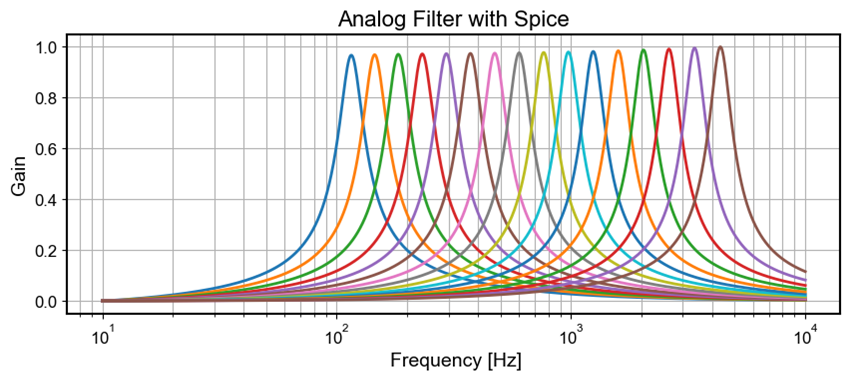

<hr style="border:2px solid grey">

## Methodology Workflow <a id="list_of_content"></a>

Following steps shows the detailed working flow. Verification using SPICE is adopted on the learned AFE after incorporated training with neural network. We have included cell outputs for your reference. 

### 1. [Framework Initialization](#framework-initialization)
### 2. [Data Preparation](#data-preparation)
### 3. [Data Augmentation](#data-augmentation)
### 4. [KWS Model Training](#kws-model-training)
### 5. [Hyperparameter Tuning](#hyperparameter-tuning)
### 6. [KWS Model Testing](#kws-model-testing)
### 7. [SNR Evaluation](#snr-evaluation)
### 8. [Filter Visualization](#filter-visualization)
### 9. [SPICE Verification-AC](#spice-verification-ac)
### 10. [SPICE Verification-Trans](#spice-verification-trans)

<hr style="border:2px solid grey">

### Step 1. Framework Initialization <a id="framework-initialization"></a>

In [1]:
from __future__ import print_function

import os
import logging

import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchaudio.transforms as atransforms

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import confusion_matrix

import src.models as mdl 
import src.data.dataset as ds 
import src.data.dataloader as dl
import src.utils.visualizing as vs 
import src.utils.cust_transforms as ctransforms

from src.train import train_model
from src.test import test_model

import importlib
importlib.reload(mdl)
importlib.reload(ds)
importlib.reload(dl)
importlib.reload(vs)

print("Packages Loaded")

Packages Loaded


In [2]:
# -------------------- Globals --------------------#
# Device Config
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {DEVICE} on {torch.cuda.get_device_name(0)} :D ")

if torch.cuda.is_available():
    cudnn.benchmark = True
    NUM_WORKERS = 2
    PIN_MEMORY = True
else:
    NUM_WORKERS = 0
    PIN_MEMORY = False

# Global Config
ORIG_SR = 16000
COMMAND_LEN = int(1.0 * ORIG_SR)    # 1 second

KEYWORDS = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
CLASSES = {0:'zero', 1:'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six', 7:'seven', 8:'eight', 9:'nine', 10:'unknown', 11:'silence'}

# Log Config
formatter = logging.Formatter("%(asctime)s:%(levelname)s:%(name)s: %(message)s")

Using cuda on NVIDIA GeForce RTX 4070 :D 


In [3]:
# -------------------- Define customized Argparse --------------------#
class Argparse:
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

        self.pad_len = int(ORIG_SR * self.pad_time)                             # padding 1600 samples on both sides
        self.n_fft = 2*self.hop_length if self.overlap else self.hop_length     # n_fft = 2*hop_length for overlap frames
        self.Val_SNR = self.val_snr if self.val_p_noise == 1.0 else "clean"     # SNR for validation
        self.hdw_lambda_i = self.hdw_lambda_i if self.freeze == False else 0.0  # hardware-aware training when freeze is False
        self.hdw_lambda_c = self.hdw_lambda_c if self.freeze == False else 0.0  # hardware-aware training when freeze is False

    def print_args(self):
        argparse_dict = vars(self)
        for key, value in argparse_dict.items():
            print(f"{key}: {value}")

args = Argparse(
    trial = 1,

    # Dataset Config
    data_path = "./SpeechCommands/speech_commands_v0.02",
    pad_time = 0.1,     # padding 0.1s of 0 on both sides
    p_noise = 0.8,      # Prob for adding noise
    snr_min = 5,        # min SNR for noise
    snr_max = 20,       # max SNR for noise

    # Dataloader Config
    batch_size = 256,       # 256 samples per batch
    sampler = "balanced",   # balanced sampler for training

    # Transform Config 
    new_sr = 20000,     # resample to 20kHz
    n_filter = 16,      # 16 filters in AFE
    hop_length = 640,   # 32ms
    overlap = False,    # False for non-overlap frames
    max_samples = 30,   # max sample length for DSCNN
    
    # Model Config
    model = "LearnAFE_v2",   # "LearnAFE_v2"
    num_classes = 12,        # 10 keywords + "unknown" + "silence"
 
    # AFE Config 
    freeze = False,         # freeze AFE params
    backbone = "DSCNN",     # DSCNN as backbone model
    afe_design = "DSF16",    # BPF and SPK config in circuit level

    # Train Config
    epochs = 20,        # 20 epochs
    print_freq = 5,     # print every 5 epochs
    num_iters = 1,      # run whole training process for 1 time
    val_p_noise = 1.0,  # Prob for adding noise in validation
    val_snr = 5,        # SNR for validation

    # Optim Config
    loss_fn = "CELoss",     # CrossEntropyLoss
    learning_rate = 0.001,  # learning rate
    weight_decay = 1e-4,    # weight decay
    l1_lambda = 1e-5,       # L1 regularization lambda
    hdw_lambda_i = 5e-5,    # regularization lambda for current ratio
    hdw_lambda_c = 4e-5,    # regularization lambda for cap ratio
)

args.model_path = "./ckpts/{}_{}_Freeze-{}".format(
    args.afe_design, 
    args.model, 
    args.freeze
)
args.model_name = "Noise-{}_SNR-{}-{}_SR-{}_hop-{}_Overlap-{}_Hdw-{}-{}_{}".format(
    args.p_noise,
    args.snr_min,
    args.snr_max, 
    args.new_sr,
    args.hop_length,
    args.overlap,
    args.hdw_lambda_i,
    args.hdw_lambda_c,
    args.loss_fn, 
)

args.save_folder = os.path.join(args.model_path, args.model_name)
if not os.path.isdir(args.save_folder):
    os.makedirs(args.save_folder)

# Uncomment to Print all arguments
args.print_args()

trial: 1
data_path: ./SpeechCommands/speech_commands_v0.02
pad_time: 0.1
p_noise: 0.8
snr_min: 5
snr_max: 20
batch_size: 256
sampler: balanced
new_sr: 20000
n_filter: 16
hop_length: 640
overlap: False
max_samples: 30
model: LearnAFE_v2
num_classes: 12
freeze: False
backbone: DSCNN
afe_design: DSF16
epochs: 20
print_freq: 5
num_iters: 1
val_p_noise: 1.0
val_snr: 5
loss_fn: CELoss
learning_rate: 0.001
weight_decay: 0.0001
l1_lambda: 1e-05
hdw_lambda_i: 5e-05
hdw_lambda_c: 4e-05
pad_len: 1600
n_fft: 640
Val_SNR: 5
model_path: ./ckpts/DSF16_LearnAFE_v2_Freeze-False
model_name: Noise-0.8_SNR-5-20_SR-20000_hop-640_Overlap-False_Hdw-5e-05-4e-05_CELoss
save_folder: ./ckpts/DSF16_LearnAFE_v2_Freeze-False/Noise-0.8_SNR-5-20_SR-20000_hop-640_Overlap-False_Hdw-5e-05-4e-05_CELoss


In [4]:
# -------------------- User-defined functions --------------------#
def setupLogger(name, logPath, level=logging.INFO):
    logger = logging.getLogger(name)
    if logger.handlers:
        return logger
    handler = logging.FileHandler(logPath)
    handler.setFormatter(formatter)
    logger.setLevel(level)
    logger.addHandler(handler)
    return logger

log_path = "logs/LearnAFE_KWS.log"
if not os.path.exists(log_path):
    open(log_path, "a").close()
logger = setupLogger("ResultsLogger", log_path)

# Log initial setup
logger.info(f"Init  - {args.save_folder} --- Trial: {args.trial}")

#### [Back to List of Content](#list_of_content)

---

### Step 2. Data Preparation <a id="data-preparation"></a>

Dataset will be downloaded under `SpeechCommands` to generate ***KWS_Dataset*** and ***KWS_Dataloader***.

In [5]:
KWS_Dataset = ds.genDatasets(
    root_path = args.data_path,
    keywords = KEYWORDS,
    classes = CLASSES,
    command_len = COMMAND_LEN,
    pad_len = args.pad_len,
)

KWS_DataLoader = dl.genDataLoader(
    dataset = KWS_Dataset,
    batch_size = args.batch_size,
    sampler = args.sampler,
    num_workers = NUM_WORKERS,
    pin_memory = PIN_MEMORY,   
)


Getting Data... 

Batch Size: 256

Train Len = 87723 , Validation Len = 10341 , Test Len = 11365

Balanced sampler is used for trainloader.
Shuffle is False for validloader.
Shuffle is False for testloader.

Train Size Batched = 342 , Validation Size Batched = 40 , Test Size Batched = 44


In [6]:
for batch_idx, (data, label) in enumerate(KWS_DataLoader["train"]):   
    if batch_idx <= 5:
        print(batch_idx, data.shape, label.cpu().numpy().shape, Counter(label.cpu().numpy().flatten()))
    else: break

0 torch.Size([256, 1, 19200]) (256,) Counter({2: 33, 1: 27, 11: 26, 5: 26, 8: 26, 4: 21, 7: 21, 3: 18, 0: 17, 6: 16, 10: 15, 9: 10})
1 torch.Size([256, 1, 19200]) (256,) Counter({5: 27, 4: 26, 7: 26, 10: 25, 6: 21, 2: 21, 11: 21, 3: 21, 9: 20, 0: 19, 8: 15, 1: 14})
2 torch.Size([256, 1, 19200]) (256,) Counter({11: 30, 3: 27, 9: 26, 2: 26, 0: 22, 8: 21, 7: 20, 1: 20, 6: 19, 4: 17, 5: 15, 10: 13})
3 torch.Size([256, 1, 19200]) (256,) Counter({3: 30, 1: 29, 2: 26, 11: 26, 7: 25, 10: 23, 4: 22, 6: 17, 0: 16, 9: 15, 8: 14, 5: 13})
4 torch.Size([256, 1, 19200]) (256,) Counter({3: 30, 2: 27, 4: 27, 6: 25, 0: 23, 1: 22, 8: 21, 5: 18, 7: 16, 11: 16, 10: 16, 9: 15})
5 torch.Size([256, 1, 19200]) (256,) Counter({5: 33, 0: 28, 11: 26, 3: 24, 10: 23, 9: 22, 1: 19, 2: 18, 4: 17, 6: 16, 8: 15, 7: 15})


#### [Back to List of Content](#list_of_content)

---

### Step 3. Data Augmentation <a id="data-augmentation"></a>



In [7]:
# -------------------- Define Transforms --------------------#

# Train Transform
train_transform = nn.Sequential(
    ctransforms.RandomAddNoise(
        p = args.p_noise, 
        snr_min = args.snr_min,
        snr_max = args.snr_max,
        noise_kwargs={
            "root_path": args.data_path,
            "classes": CLASSES,
            "noise_samples": 1000,
            "clip_len": COMMAND_LEN + args.pad_len * 2,
        },
    ),
    atransforms.Resample(
        orig_freq = ORIG_SR,
        new_freq = args.new_sr,
    )
)

# Val Transform
val_transform = nn.Sequential(
    ctransforms.RandomAddNoise(
        p = args.val_p_noise, 
        snr_min = args.val_snr,
        snr_max = args.val_snr + 1,
        noise_kwargs={
            "root_path": args.data_path,
            "classes": CLASSES,
            "noise_samples": 1000,
            "clip_len": COMMAND_LEN,
        },
    ),
    atransforms.Resample(
        orig_freq = ORIG_SR,
        new_freq = args.new_sr,
    )
)

# Test Transform
test_transform = nn.Sequential(
    ctransforms.RandomAddNoise(
        p = 0.0, 
        snr_min = args.snr_min,
        snr_max = args.snr_max,
        noise_kwargs={
            "root_path": args.data_path,
            "classes": CLASSES,
            "noise_samples": 1000,
            "clip_len": COMMAND_LEN,
        },
    ),
    atransforms.Resample(
        orig_freq = ORIG_SR,
        new_freq = args.new_sr,
    )
)

In [8]:
DATA_AUGMENTATION = {
    "train": train_transform.to(DEVICE),
    "val": val_transform.to(DEVICE),
    "test": test_transform.to(DEVICE),
}
print(DATA_AUGMENTATION)

{'train': Sequential(
  (0): RandomAddNoise()
  (1): Resample()
), 'val': Sequential(
  (0): RandomAddNoise()
  (1): Resample()
), 'test': Sequential(
  (0): RandomAddNoise()
  (1): Resample()
)}


#### [Back to List of Content](#list_of_content)

---

### Step 4. KWS Model Training <a id="kws-model-training"></a>

In [9]:
def getBackbone(backbone, args):
    match backbone:
        case "DSCNN":
            return mdl.DSCNN(
                args.num_classes,
            )
        case _:
            raise Exception(
                "No such model, please select within (DSCNN)"
            )
        
def getModel(name, args):
    backbone_mdl = getBackbone(args.backbone, args)
    match name:
        case "LearnAFE_v2":
            return mdl.LearnAFE_v2(
                n_filter = args.n_filter,
                sample_rate = args.new_sr,
                config_path = args.afe_design,
                hop_length = args.hop_length,
                overlap = args.overlap,
                freeze = args.freeze,
                max_sample_len = args.max_samples,
                backbone = backbone_mdl,
            ).to(DEVICE)
        case _:
            raise Exception(
                "No such model, please select within (LearnAFE_v2)"
            )

`VAL_WEIGHT` is a manual rescaling weight given to each class for validation. Uncomment and run `_,VAL_WEIGHT = dl.genSampler(KWS_Dataset["val"])` to get this weight, but it may take long time. Since the samples of validation dataset are fixed, the `VAL_WEIGHT` can be reagrded as fixed tensor. 

In [10]:
# -------------------- Define loss function selection --------------------#

# _,VAL_WEIGHT = dl.genSampler(KWS_Dataset["val"])
VAL_WEIGHT = torch.tensor([
    0.00260417, 0.002849, 0.00289855, 0.00280899, 
    0.00268097, 0.0027248, 0.0026455, 0.00258398, 
    0.00289017, 0.00280899, 0.00015778, 0.00277778
])

def getLoss(name):
    if name == "NLLLoss":
        loss_fn = {
            "train": nn.NLLLoss().to(DEVICE),
            "val": nn.NLLLoss(weight=VAL_WEIGHT).to(DEVICE),
        }
        return loss_fn

    elif name == "CELoss":
        loss_fn = {
            "train": nn.CrossEntropyLoss().to(DEVICE),
            "val": nn.CrossEntropyLoss(weight=VAL_WEIGHT).to(DEVICE),
        }
        return loss_fn

    else:
        raise Exception(
            "No such loss function, please select within (NLLLoss, CrossEntropyLoss)"
        )

In [11]:
def iteration(args, strategy, save_model=False):
    best_result = {}
    for item in strategy:
        best_result[item] = 0
    best_dict = {}

    print('Perform', args.model, 'Model Architecture\n')

    for i in range(args.num_iters):
        print('\nModel iter: {}/{}...\n'.format(i+1, args.num_iters))
        KWS_classifier = getModel(args.model, args)
        loss_fn = getLoss(args.loss_fn)
        print('Model Reset')

        optimizer = optim.Adam(
            KWS_classifier.parameters(), 
            lr=args.learning_rate, 
            weight_decay=args.weight_decay
        )

        # scheduler to reduce learning rate when a metric has stopped improving
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, 
            mode='min',  
            patience=5, 
        )

        best_iter_dict = train_model(
            device=DEVICE,
            dataloader=KWS_DataLoader,
            model=KWS_classifier,
            criterion=loss_fn,
            optimizer=optimizer,
            scheduler=scheduler, 
            feature_transform=DATA_AUGMENTATION,
            l1_reg=args.l1_lambda,
            hdw_reg_i=args.hdw_lambda_i,
            hdw_reg_c=args.hdw_lambda_c,
            n_epochs=args.epochs,
            print_every=args.print_freq,
            strategy=strategy,
        )
        print('')

        for item in strategy:
            test_classifier = getModel(args.model, args)
            test_classifier.load_state_dict(best_iter_dict[item]["model_state_dict"])
            test_classifier.cuda().eval()

            test_acc, *_ = test_model(
                device=DEVICE,
                dataloader=KWS_DataLoader["test"],
                trained_model=test_classifier,
                feature_transform=DATA_AUGMENTATION["test"], 
            )

            print('Iter best test accuracy under', item, 'is:', test_acc) 

            if test_acc > best_result[item]:
                best_result[item] = test_acc
                best_dict[item] = best_iter_dict[item]

            epoch,_,_, acc, loss = best_iter_dict[item].values()
            valloss = 1/loss
            log_msg = (
                f"Train - Model: {args.model}. Epoch: {args.epochs}, "
                f"Strategy: {item}, "
                f"TestAccuracy: {best_result[item]:>0.2f} at epoch {epoch}, "
                f"ValMethod: {args.Val_SNR}, "
                f"ValAccuracy: {acc:>0.2f}, "
                f"ValLoss: {valloss:>0.2f} "
            )
            logger.info(log_msg)
        print('')
    
    if save_model:
        PATH = os.path.join(args.save_folder, "Trial-{}_Val-{}.pt".format(args.trial, args.Val_SNR))
        torch.save(best_dict, PATH)

    return best_result

There are two ways to select best result among iterations. `model_state_dict` from both `accuracy` and `loss` strategies are saved in `.pt` files. 

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:


Train loss: 429.6673 | acc: 0.6672|  Val loss: 64.7057 | acc: 0.7464| 

Epoch 6/20:
Train loss: 146.8391 | acc: 0.8900|  Val loss: 39.0655 | acc: 0.8510| 

Epoch 11/20:
Train loss: 110.9990 | acc: 0.9144|  Val loss: 28.1659 | acc: 0.8774| 

Epoch 16/20:
Train loss: 97.7246 | acc: 0.9235|  Val loss: 30.9992 | acc: 0.8882| 
Finished Training  | Time:407.97456407546997


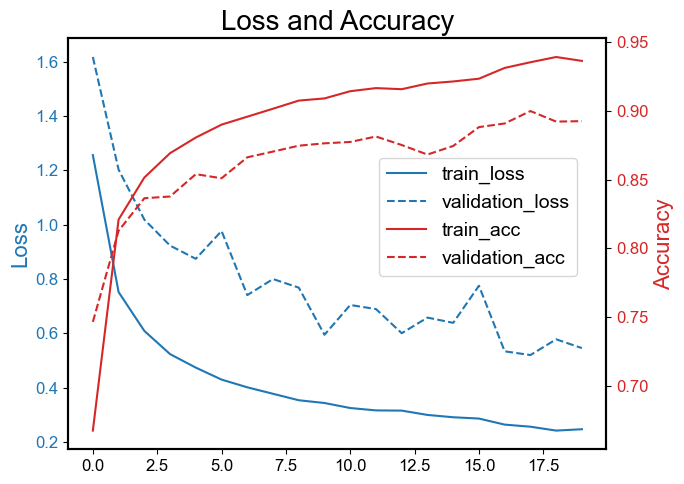


Iter best test accuracy under accuracy is: 0.9258657805346582
Iter best test accuracy under loss is: 0.9259857649659656


Best results of iters:  {'accuracy': 0.9258657805346582, 'loss': 0.9259857649659656}


In [13]:
strategy = ["accuracy", "loss"]
best_results = iteration(args, strategy, save_model=True)
print('\nBest results of iters: ', best_results)

#### [Back to List of Content](#list_of_content)

---

### Step 5. Hyperparameter Tuning <a id="hyperparameter-tuning"></a>

Ax is an testing platform developed by Meta for various experimentation, including machine learning algorithm. The following cells in this section illustrate the use of AX's API to tune the hyperparameters based on the [tutorial](https://ax.dev/) [[7]](#ref7). While Ray is best suited for large-scale parallelism, AX itself include some form of parallelization at a smaller scale. Based on a [study on the different hyperparameter optimizers](https://arxiv.org/abs/2311.15854) [[8]](#ref8), AX's implementation for hyperparameters was shown to be a better as compared to others like HyperOpt and BayesOpt.


The requirements for using AX as shown in [here](https://ax.dev/docs/installation.html):
- Python 3.9 or later is needed.
- The required Python dependencies are:
    - botorch
    - jinja2
    - pandas
    - scipy
    - sklearn
    - plotly >=2.2.1
Then, use pip to install in python even if conda env is used:
```
pip install ax-platform
```

In [12]:
from ax.service.ax_client import AxClient, ObjectiveProperties
from ax.service.utils.report_utils import exp_to_df
from ax.utils.notebook.plotting import init_notebook_plotting, render
# Initiate Client
ax_client = AxClient()
# Create an experiment with required arguments: name, parameters, and objective_name.
ax_client.create_experiment(
    name="tune_cnn_for_SSF_Filterbank",  # The name of the experiment.
    parameters=[
        {
            "name": "lr",  # The name of the parameter.
            "type": "range",  # The type of the parameter ("range", "choice" or "fixed").
            "bounds": [1e-6, 0.4],  # The bounds for range parameters. 
            # "values" The possible values for choice parameters .
            # "value" The fixed value for fixed parameters.
            "value_type": "float",  # Optional, the value type ("int", "float", "bool" or "str"). Defaults to inference from type of "bounds".
            "log_scale": True,  # Optional, whether to use a log scale for range parameters. Defaults to False.
            # "is_ordered" Optional, a flag for choice parameters.
        },
        {
            "name": "wgtDecay",  
            "type": "range",  
            "bounds": [1e-6, 0.4],
            "value_type": "float",
            "log_scale": True,
        },
        {
            "name": "lambda1",  
            "type": "range",  
            "bounds": [1e-6, 0.1],
            "value_type": "float",
            "log_scale": True,
        },
        {
            "name": "lambdaI",  
            "type": "range",  
            "bounds": [1e-6, 0.4],
            "value_type": "float",
            "log_scale": True,
        },
        {
            "name": "lambdaC",  
            "type": "range",  
            "bounds": [1e-6, 0.4],
            "value_type": "float",
            "log_scale": True,
        },
    ],

    objectives={"accuracy": ObjectiveProperties(minimize=False)},  # The objective name and minimization setting.
    # parameter_constraints: Optional, a list of strings of form "p1 >= p2" or "p1 + p2 <= some_bound".
    # outcome_constraints: Optional, a list of strings of form "constrained_metric <= some_bound".
)

[INFO 04-10 13:11:26] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.
[INFO 04-10 13:11:26] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='lr', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True), RangeParameter(name='wgtDecay', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True), RangeParameter(name='lambda1', parameter_type=FLOAT, range=[1e-06, 0.1], log_scale=True), RangeParameter(name='lambdaI', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True), RangeParameter(name='lambdaC', parameter_type=FLOAT, range=[1e-06, 0.4], log_scale=True)], parameter_constraints=[]).
[INFO 04-10 13:11:26] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there is at least one ordered parameter and there are no unordered categorical parameters.
[INFO 04-10 13:11:26] ax

In [13]:
def train_eval_acc(parameters):
    args.learning_rate = parameters.get("lr", 0.001)  # learning rate
    args.weight_decay = parameters.get("wgtDecay", 1e-4)    # weight decay
    args.l1_lambda = parameters.get("lambda1", 1e-5)       # L1 regularization lambda
    args.hdw_lambda_i = parameters.get("lambdaI", 5e-5)      # regularization lambda for gm ratio
    args.hdw_lambda_c = parameters.get("lambdaC",4e-5)      # regularization lambda for cap ratio
    best_results = iteration(args, strategy, save_model=True)
    return best_results["accuracy"]

[INFO 04-10 13:11:30] ax.core.experiment: Attached custom parameterizations [{'lr': 0.001, 'wgtDecay': 0.0001, 'lambda1': 1e-05, 'lambdaI': 0.0001, 'lambdaC': 0.0001}] as trial 0.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 423.9796 | acc: 0.6826|  Val loss: 50.6119 | acc: 0.7767| 

Epoch 6/20:
Train loss: 143.1556 | acc: 0.8945|  Val loss: 30.7953 | acc: 0.8702| 

Epoch 11/20:
Train loss: 111.3099 | acc: 0.9143|  Val loss: 24.0049 | acc: 0.8777| 

Epoch 16/20:
Train loss: 97.6430 | acc: 0.9235|  Val loss: 25.6381 | acc: 0.8838| 
Finished Training  | Time:418.47613430023193


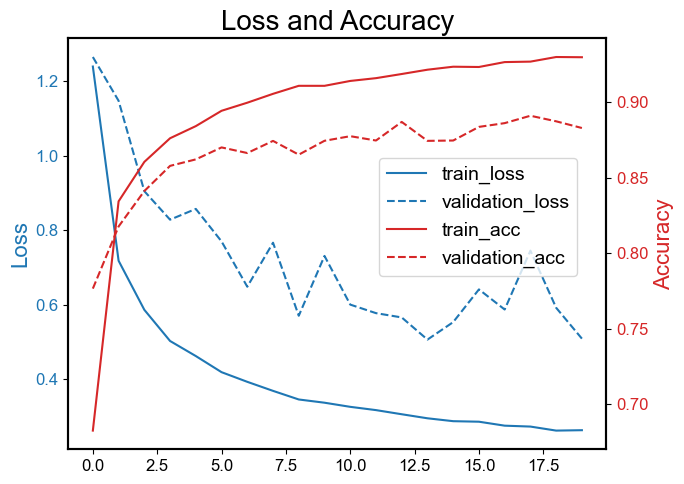


Iter best test accuracy under accuracy is: 0.9147276359075075


[INFO 04-10 13:18:32] ax.service.ax_client: Completed trial 0 with data: {'accuracy': (0.914728, None)}.


Iter best test accuracy under loss is: 0.913864361539734



In [14]:
# Attach the trial
ax_client.attach_trial(
    parameters={"lr": 0.001, "wgtDecay":1e-4, "lambda1":1e-5, "lambdaI":1e-4, "lambdaC":1e-4}
)

# Get the parameters and run the trial 
baseline_parameters = ax_client.get_trial_parameters(trial_index=0)
ax_client.complete_trial(trial_index=0, raw_data=train_eval_acc(baseline_parameters))

Note: This will take very long time for hyperparameter tuning since it will run whole training loop for 25 times.

[INFO 04-10 13:18:32] ax.service.ax_client: Generated new trial 1 with parameters {'lr': 0.004086, 'wgtDecay': 0.000148, 'lambda1': 0.000102, 'lambdaI': 0.000843, 'lambdaC': 0.172008} using model Sobol.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 7055.7272 | acc: 0.7685|  Val loss: 38.4557 | acc: 0.8065| 

Epoch 6/20:
Train loss: 5432.2843 | acc: 0.8965|  Val loss: 39.4958 | acc: 0.8263| 

Epoch 11/20:
Train loss: 4858.3024 | acc: 0.9069|  Val loss: 24.5185 | acc: 0.8831| 

Epoch 16/20:
Train loss: 4528.8461 | acc: 0.9285|  Val loss: 19.3987 | acc: 0.9166| 
Finished Training  | Time:417.1094539165497


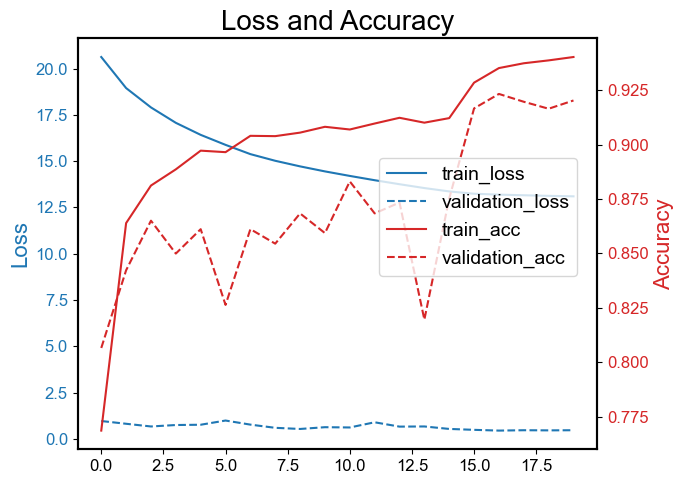


Iter best test accuracy under accuracy is: 0.9417494427040783


[INFO 04-10 13:25:32] ax.service.ax_client: Completed trial 1 with data: {'accuracy': (0.941749, None)}.
[INFO 04-10 13:25:32] ax.service.ax_client: Generated new trial 2 with parameters {'lr': 0.004774, 'wgtDecay': 6e-06, 'lambda1': 0.000177, 'lambdaI': 0.019667, 'lambdaC': 0.003335} using model Sobol.


Iter best test accuracy under loss is: 0.9414395325893996

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 866.1436 | acc: 0.7656|  Val loss: 38.3965 | acc: 0.8009| 

Epoch 6/20:
Train loss: 652.6708 | acc: 0.8939|  Val loss: 40.6753 | acc: 0.7654| 

Epoch 11/20:
Train loss: 626.0779 | acc: 0.8994|  Val loss: 63.1135 | acc: 0.6321| 

Epoch 16/20:
Train loss: 588.6882 | acc: 0.9280|  Val loss: 20.6895 | acc: 0.9055| 
Finished Training  | Time:417.1842815876007


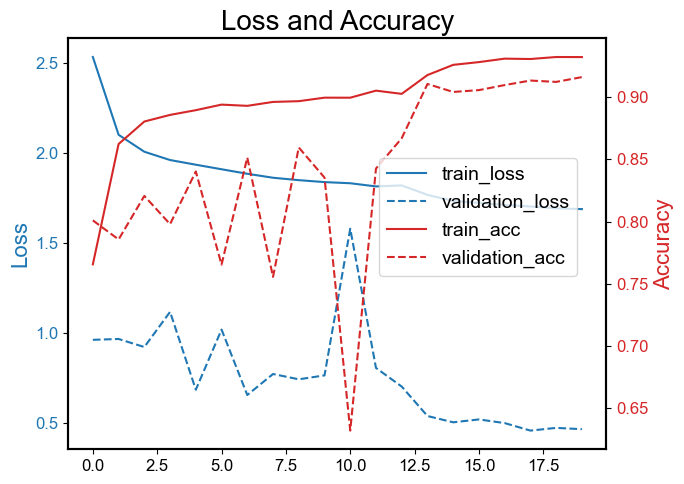


Iter best test accuracy under accuracy is: 0.9396816106456584


[INFO 04-10 13:32:32] ax.service.ax_client: Completed trial 2 with data: {'accuracy': (0.939682, None)}.
[INFO 04-10 13:32:32] ax.service.ax_client: Generated new trial 3 with parameters {'lr': 5.4e-05, 'wgtDecay': 0.000161, 'lambda1': 0.056748, 'lambdaI': 0.038117, 'lambdaC': 1e-06} using model Sobol.


Iter best test accuracy under loss is: 0.9397539610518716

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 42333.7050 | acc: 0.1575|  Val loss: 101.4378 | acc: 0.1994| 

Epoch 6/20:
Train loss: 19670.8777 | acc: 0.6239|  Val loss: 73.5072 | acc: 0.6047| 

Epoch 11/20:
Train loss: 13683.2080 | acc: 0.8018|  Val loss: 63.2033 | acc: 0.7615| 

Epoch 16/20:
Train loss: 10726.6029 | acc: 0.8348|  Val loss: 69.4380 | acc: 0.7680| 
Finished Training  | Time:417.737340927124


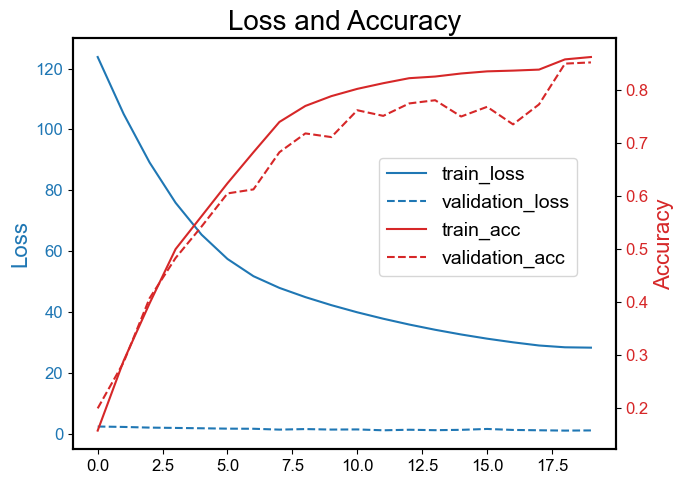


Iter best test accuracy under accuracy is: 0.8818361923060462


[INFO 04-10 13:39:33] ax.service.ax_client: Completed trial 3 with data: {'accuracy': (0.881836, None)}.
[INFO 04-10 13:39:33] ax.service.ax_client: Generated new trial 4 with parameters {'lr': 9.6e-05, 'wgtDecay': 3e-06, 'lambda1': 0.002676, 'lambdaI': 0.036058, 'lambdaC': 0.0123} using model Sobol.


Iter best test accuracy under loss is: 0.8822126160789572

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 3771.8182 | acc: 0.3804|  Val loss: 85.3931 | acc: 0.4898| 

Epoch 6/20:
Train loss: 2823.8521 | acc: 0.7599|  Val loss: 63.8537 | acc: 0.7320| 

Epoch 11/20:
Train loss: 2398.6233 | acc: 0.8165|  Val loss: 53.6647 | acc: 0.7941| 

Epoch 16/20:
Train loss: 2143.9731 | acc: 0.8443|  Val loss: 46.5949 | acc: 0.8238| 
Finished Training  | Time:417.756192445755


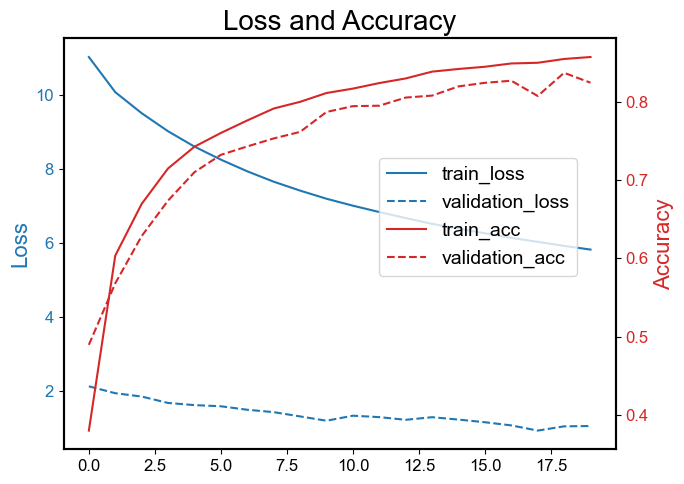


Iter best test accuracy under accuracy is: 0.8720382795489457


[INFO 04-10 13:46:34] ax.service.ax_client: Completed trial 4 with data: {'accuracy': (0.872038, None)}.
[INFO 04-10 13:46:34] ax.service.ax_client: Generated new trial 5 with parameters {'lr': 0.000545, 'wgtDecay': 0.364097, 'lambda1': 0.000199, 'lambdaI': 6.9e-05, 'lambdaC': 0.000108} using model Sobol.


Iter best test accuracy under loss is: 0.8729657072703331

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 599.0097 | acc: 0.6212|  Val loss: 73.8492 | acc: 0.6777| 

Epoch 6/20:
Train loss: 505.2697 | acc: 0.8447|  Val loss: 74.2919 | acc: 0.8067| 

Epoch 11/20:
Train loss: 513.5942 | acc: 0.8556|  Val loss: 70.0599 | acc: 0.8439| 

Epoch 16/20:
Train loss: 516.1764 | acc: 0.8522|  Val loss: 70.2762 | acc: 0.8461| 
Finished Training  | Time:417.55462074279785


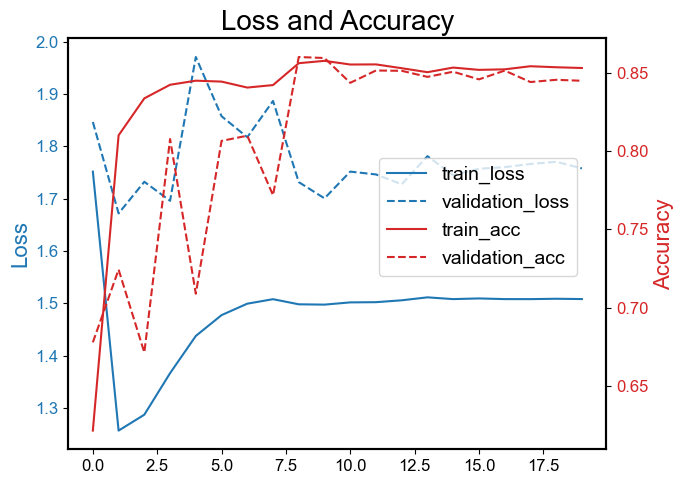


Iter best test accuracy under accuracy is: 0.869594753392075


[INFO 04-10 13:53:34] ax.service.ax_client: Completed trial 5 with data: {'accuracy': (0.869595, None)}.
[INFO 04-10 13:53:34] ax.service.ax_client: Generated new trial 6 with parameters {'lr': 0.006533, 'wgtDecay': 0.006072, 'lambda1': 0.021487, 'lambdaI': 0.12922, 'lambdaC': 0.000226} using model Sobol.


Iter best test accuracy under loss is: 0.8698924987124755

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 4385.0202 | acc: 0.6156|  Val loss: 1128.2003 | acc: 0.0833| 

Epoch 6/20:
Train loss: 1093.2173 | acc: 0.6458|  Val loss: 95.5217 | acc: 0.2169| 

Epoch 11/20:
Train loss: 850.2887 | acc: 0.6690|  Val loss: 272.0784 | acc: 0.1328| 

Epoch 16/20:
Train loss: 620.9751 | acc: 0.7288|  Val loss: 76.6436 | acc: 0.5516| 
Finished Training  | Time:417.3521218299866


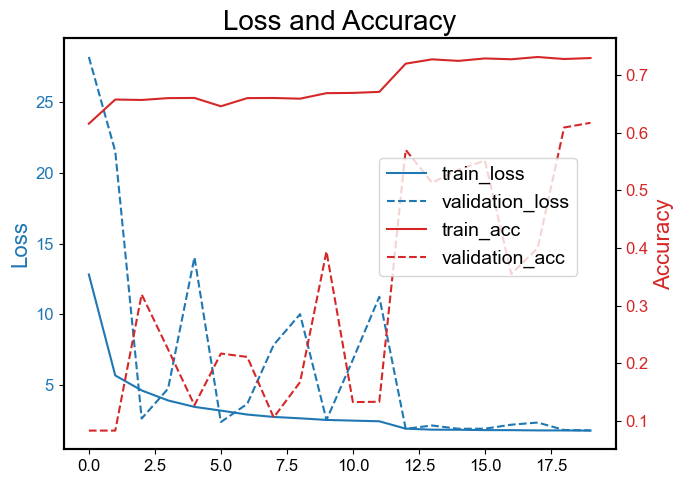


Iter best test accuracy under accuracy is: 0.7033733274869519


[INFO 04-10 14:00:35] ax.service.ax_client: Completed trial 6 with data: {'accuracy': (0.703373, None)}.
[INFO 04-10 14:00:35] ax.service.ax_client: Generated new trial 7 with parameters {'lr': 0.002486, 'wgtDecay': 0.287033, 'lambda1': 0.000125, 'lambdaI': 1e-06, 'lambdaC': 0.016439} using model Sobol.


Iter best test accuracy under loss is: 0.7069381300206351

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 1130.2952 | acc: 0.7191|  Val loss: 99.4211 | acc: 0.2438| 

Epoch 6/20:
Train loss: 830.3766 | acc: 0.7623|  Val loss: 84.2871 | acc: 0.5067| 

Epoch 11/20:
Train loss: 626.7503 | acc: 0.7390|  Val loss: 100.3910 | acc: 0.3509| 

Epoch 16/20:
Train loss: 549.7232 | acc: 0.7999|  Val loss: 64.0353 | acc: 0.7457| 
Finished Training  | Time:417.59986662864685


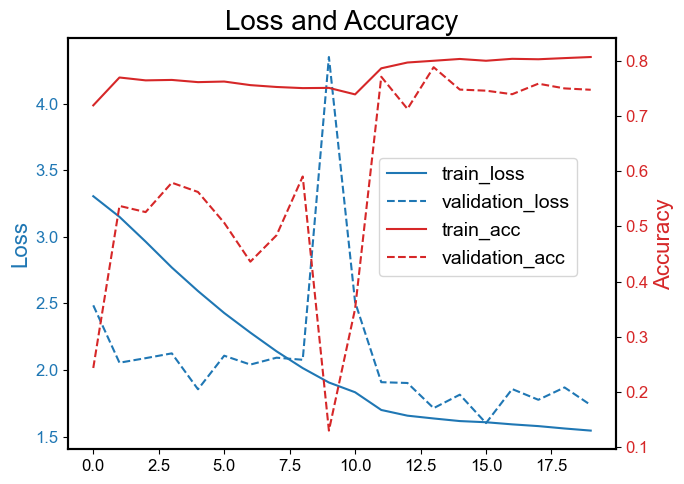


Iter best test accuracy under accuracy is: 0.7890722618430557


[INFO 04-10 14:07:35] ax.service.ax_client: Completed trial 7 with data: {'accuracy': (0.789072, None)}.
[INFO 04-10 14:07:35] ax.service.ax_client: Generated new trial 8 with parameters {'lr': 0.001764, 'wgtDecay': 6e-06, 'lambda1': 3e-05, 'lambdaI': 0.00567, 'lambdaC': 7e-06} using model Sobol.


Iter best test accuracy under loss is: 0.7880200166251217

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 458.7969 | acc: 0.7413|  Val loss: 51.4177 | acc: 0.8126| 

Epoch 6/20:
Train loss: 230.6085 | acc: 0.9007|  Val loss: 38.0152 | acc: 0.8660| 

Epoch 11/20:
Train loss: 207.1944 | acc: 0.9174|  Val loss: 27.8103 | acc: 0.8895| 

Epoch 16/20:
Train loss: 187.0275 | acc: 0.9373|  Val loss: 18.9143 | acc: 0.9061| 
Finished Training  | Time:417.5796389579773


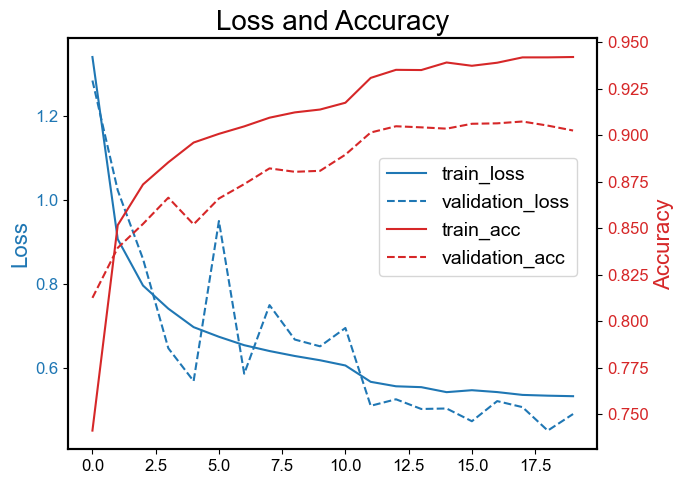


Iter best test accuracy under accuracy is: 0.9307594354414319


[INFO 04-10 14:14:36] ax.service.ax_client: Completed trial 8 with data: {'accuracy': (0.930759, None)}.
[INFO 04-10 14:14:36] ax.service.ax_client: Generated new trial 9 with parameters {'lr': 9.8e-05, 'wgtDecay': 1e-06, 'lambda1': 4e-06, 'lambdaI': 7e-06, 'lambdaC': 1.6e-05} using model Sobol.


Iter best test accuracy under loss is: 0.9305756706118733

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 658.6493 | acc: 0.4013|  Val loss: 80.3683 | acc: 0.4674| 

Epoch 6/20:
Train loss: 330.4089 | acc: 0.7708|  Val loss: 62.3873 | acc: 0.7286| 

Epoch 11/20:
Train loss: 263.2763 | acc: 0.8177|  Val loss: 54.5638 | acc: 0.7757| 

Epoch 16/20:
Train loss: 227.7484 | acc: 0.8386|  Val loss: 44.7381 | acc: 0.8100| 
Finished Training  | Time:417.54640460014343


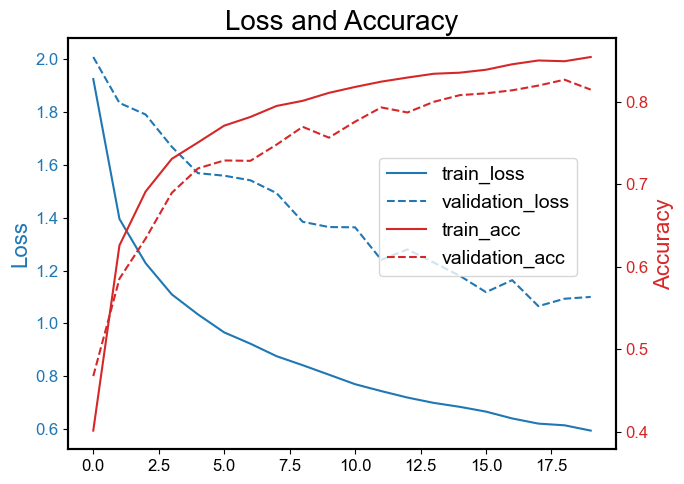


Iter best test accuracy under accuracy is: 0.8657675016751112


[INFO 04-10 14:21:36] ax.service.ax_client: Completed trial 9 with data: {'accuracy': (0.865768, None)}.
[INFO 04-10 14:21:37] ax.service.ax_client: Generated new trial 10 with parameters {'lr': 9e-06, 'wgtDecay': 0.014552, 'lambda1': 7e-06, 'lambdaI': 0.000312, 'lambdaC': 0.001284} using model Sobol.


Iter best test accuracy under loss is: 0.8660748619165495

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 957.9481 | acc: 0.1381|  Val loss: 109.1133 | acc: 0.1634| 

Epoch 6/20:
Train loss: 696.7809 | acc: 0.4095|  Val loss: 96.0620 | acc: 0.3314| 

Epoch 11/20:
Train loss: 600.6379 | acc: 0.5397|  Val loss: 89.0356 | acc: 0.4424| 

Epoch 16/20:
Train loss: 550.2278 | acc: 0.6068|  Val loss: 81.7992 | acc: 0.5398| 
Finished Training  | Time:417.7540693283081


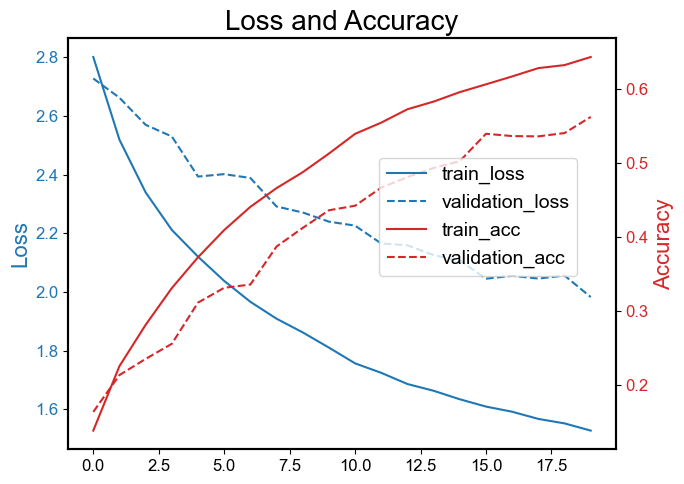


Iter best test accuracy under accuracy is: 0.6756296061891468


[INFO 04-10 14:28:37] ax.service.ax_client: Completed trial 10 with data: {'accuracy': (0.67563, None)}.


Iter best test accuracy under loss is: 0.6747809960251838



[INFO 04-10 14:28:38] ax.service.ax_client: Generated new trial 11 with parameters {'lr': 0.003743, 'wgtDecay': 1.5e-05, 'lambda1': 4.2e-05, 'lambdaI': 0.000732, 'lambdaC': 0.002946} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 461.5033 | acc: 0.7652|  Val loss: 32.8862 | acc: 0.7922| 

Epoch 6/20:
Train loss: 262.7987 | acc: 0.9054|  Val loss: 32.4765 | acc: 0.8651| 

Epoch 11/20:
Train loss: 249.1831 | acc: 0.9175|  Val loss: 26.9670 | acc: 0.8785| 

Epoch 16/20:
Train loss: 243.2567 | acc: 0.9218|  Val loss: 19.0384 | acc: 0.8820| 
Finished Training  | Time:418.11248540878296


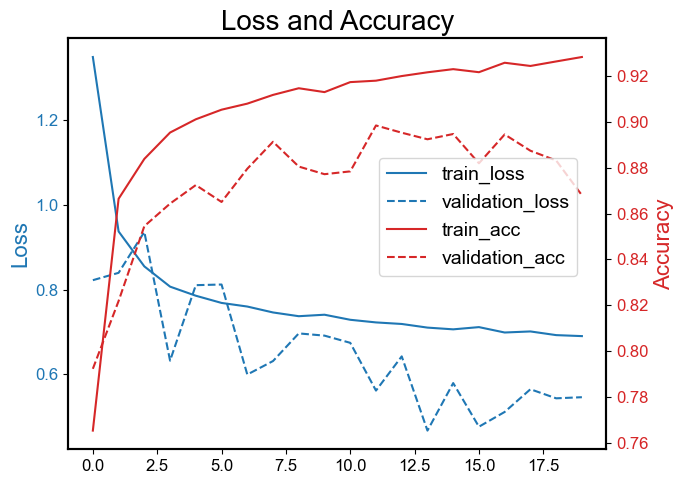


Iter best test accuracy under accuracy is: 0.9125323230264996


[INFO 04-10 14:35:39] ax.service.ax_client: Completed trial 11 with data: {'accuracy': (0.912532, None)}.


Iter best test accuracy under loss is: 0.9100755615643327



[INFO 04-10 14:35:39] ax.service.ax_client: Generated new trial 12 with parameters {'lr': 0.003643, 'wgtDecay': 2e-05, 'lambda1': 7.1e-05, 'lambdaI': 0.019983, 'lambdaC': 0.374589} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 15593.5615 | acc: 0.7701|  Val loss: 35.7342 | acc: 0.7984| 

Epoch 6/20:
Train loss: 14525.4160 | acc: 0.9069|  Val loss: 28.1894 | acc: 0.8697| 

Epoch 11/20:
Train loss: 14156.9187 | acc: 0.9152|  Val loss: 26.8524 | acc: 0.8799| 

Epoch 16/20:
Train loss: 14011.0945 | acc: 0.9219|  Val loss: 20.7776 | acc: 0.8937| 
Finished Training  | Time:418.3174138069153


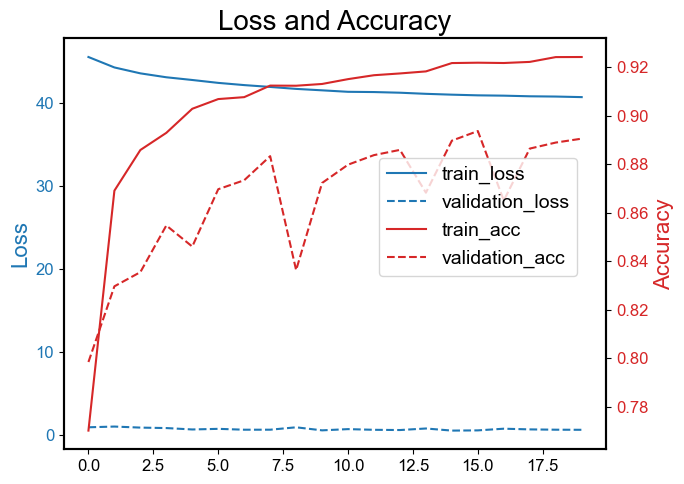


Iter best test accuracy under accuracy is: 0.9245175566967326


[INFO 04-10 14:42:41] ax.service.ax_client: Completed trial 12 with data: {'accuracy': (0.924518, None)}.


Iter best test accuracy under loss is: 0.9231189158972682



[INFO 04-10 14:42:41] ax.service.ax_client: Generated new trial 13 with parameters {'lr': 0.002432, 'wgtDecay': 4.8e-05, 'lambda1': 5.1e-05, 'lambdaI': 0.028561, 'lambdaC': 0.000821} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 866.3210 | acc: 0.7467|  Val loss: 48.0336 | acc: 0.8102| 

Epoch 6/20:
Train loss: 631.8089 | acc: 0.9043|  Val loss: 30.7005 | acc: 0.8623| 

Epoch 11/20:
Train loss: 601.5405 | acc: 0.9172|  Val loss: 22.7448 | acc: 0.8865| 

Epoch 16/20:
Train loss: 588.7337 | acc: 0.9241|  Val loss: 21.0579 | acc: 0.8972| 
Finished Training  | Time:417.890837430954


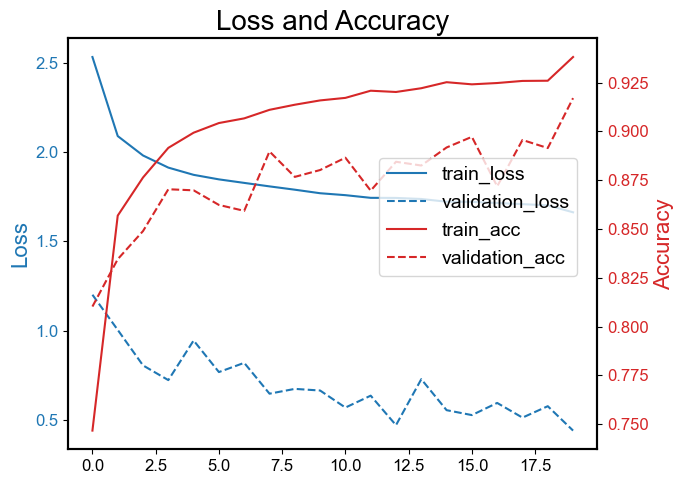


Iter best test accuracy under accuracy is: 0.9366566518116867


[INFO 04-10 14:49:43] ax.service.ax_client: Completed trial 13 with data: {'accuracy': (0.936657, None)}.


Iter best test accuracy under loss is: 0.9373468110550124



[INFO 04-10 14:49:44] ax.service.ax_client: Generated new trial 14 with parameters {'lr': 0.001657, 'wgtDecay': 5.8e-05, 'lambda1': 0.000227, 'lambdaI': 0.00445, 'lambdaC': 0.012359} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 1093.3526 | acc: 0.7170|  Val loss: 47.7331 | acc: 0.7678| 

Epoch 6/20:
Train loss: 760.1399 | acc: 0.8959|  Val loss: 29.7160 | acc: 0.8617| 

Epoch 11/20:
Train loss: 710.3602 | acc: 0.9080|  Val loss: 30.2545 | acc: 0.8666| 

Epoch 16/20:
Train loss: 681.3742 | acc: 0.9140|  Val loss: 30.8185 | acc: 0.8737| 
Finished Training  | Time:421.4210171699524


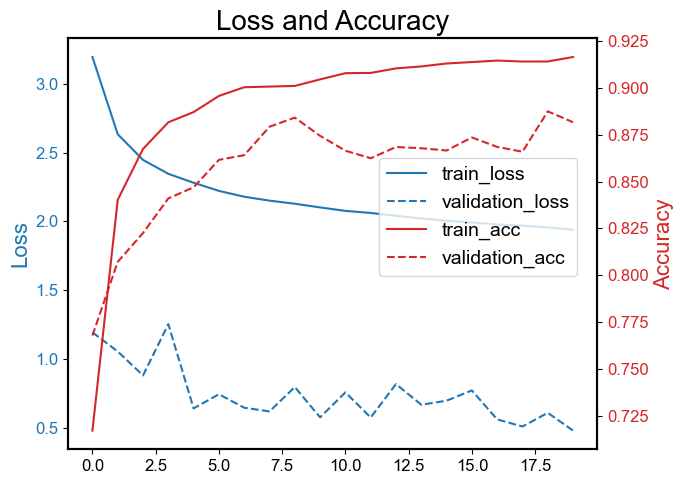


Iter best test accuracy under accuracy is: 0.9094069047156522


[INFO 04-10 14:56:48] ax.service.ax_client: Completed trial 14 with data: {'accuracy': (0.909407, None)}.


Iter best test accuracy under loss is: 0.9087798360917375



[INFO 04-10 14:56:49] ax.service.ax_client: Generated new trial 15 with parameters {'lr': 0.005708, 'wgtDecay': 4e-06, 'lambda1': 2.6e-05, 'lambdaI': 0.101036, 'lambdaC': 0.000344} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 1973.4718 | acc: 0.7685|  Val loss: 39.4733 | acc: 0.8179| 

Epoch 6/20:
Train loss: 1769.0378 | acc: 0.9103|  Val loss: 24.6055 | acc: 0.8871| 

Epoch 11/20:
Train loss: 1756.3673 | acc: 0.9219|  Val loss: 24.5899 | acc: 0.8850| 

Epoch 16/20:
Train loss: 1742.5372 | acc: 0.9285|  Val loss: 18.0054 | acc: 0.8952| 
Finished Training  | Time:418.4963479042053


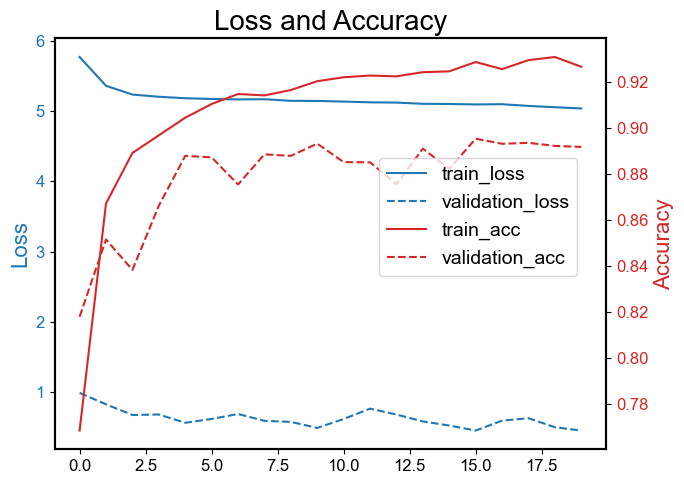


Iter best test accuracy under accuracy is: 0.9235927283000634


[INFO 04-10 15:03:51] ax.service.ax_client: Completed trial 15 with data: {'accuracy': (0.923593, None)}.


Iter best test accuracy under loss is: 0.9244083727090078



[INFO 04-10 15:03:51] ax.service.ax_client: Generated new trial 16 with parameters {'lr': 0.015665, 'wgtDecay': 0.000115, 'lambda1': 5.1e-05, 'lambdaI': 0.006958, 'lambdaC': 0.040325} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 1871.9225 | acc: 0.7725|  Val loss: 40.6728 | acc: 0.7694| 

Epoch 6/20:
Train loss: 1254.3067 | acc: 0.8806|  Val loss: 35.3762 | acc: 0.7832| 

Epoch 11/20:
Train loss: 1141.9224 | acc: 0.8853|  Val loss: 32.0119 | acc: 0.8447| 

Epoch 16/20:
Train loss: 1068.0864 | acc: 0.9074|  Val loss: 20.0280 | acc: 0.9060| 
Finished Training  | Time:418.4306399822235


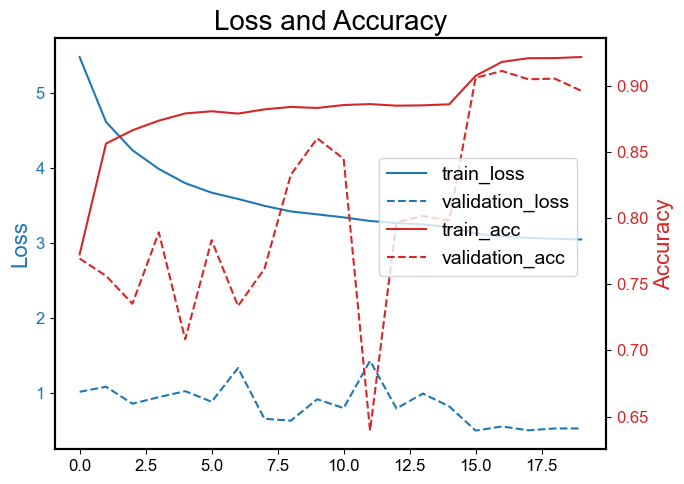


Iter best test accuracy under accuracy is: 0.9270014164257057


[INFO 04-10 15:10:53] ax.service.ax_client: Completed trial 16 with data: {'accuracy': (0.927001, None)}.


Iter best test accuracy under loss is: 0.9284789525744798



[INFO 04-10 15:10:54] ax.service.ax_client: Generated new trial 17 with parameters {'lr': 0.006315, 'wgtDecay': 7.9e-05, 'lambda1': 2e-05, 'lambdaI': 0.006805, 'lambdaC': 1.5e-05} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 403.5115 | acc: 0.7683|  Val loss: 39.9922 | acc: 0.7980| 

Epoch 6/20:
Train loss: 226.5905 | acc: 0.9022|  Val loss: 29.8047 | acc: 0.8587| 

Epoch 11/20:
Train loss: 188.8970 | acc: 0.9360|  Val loss: 19.5245 | acc: 0.9103| 

Epoch 16/20:
Train loss: 179.8999 | acc: 0.9422|  Val loss: 18.3815 | acc: 0.9168| 
Finished Training  | Time:417.9616825580597


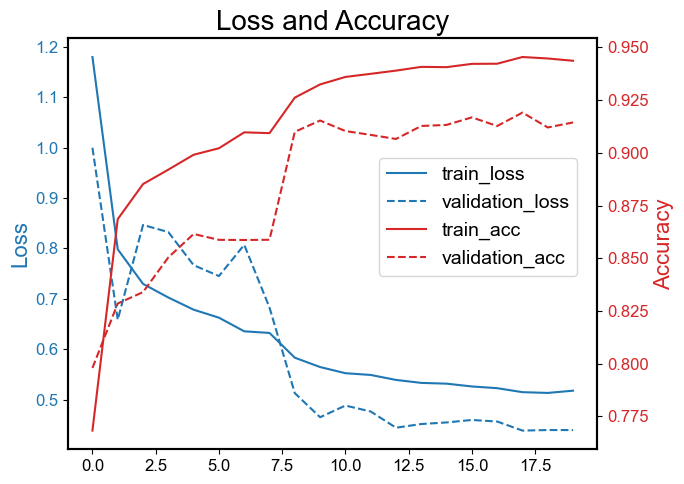


Iter best test accuracy under accuracy is: 0.9378663838149753


[INFO 04-10 15:17:55] ax.service.ax_client: Completed trial 17 with data: {'accuracy': (0.937866, None)}.


Iter best test accuracy under loss is: 0.9384653824228278



[INFO 04-10 15:17:55] ax.service.ax_client: Generated new trial 18 with parameters {'lr': 0.007872, 'wgtDecay': 1.5e-05, 'lambda1': 0.00012, 'lambdaI': 0.018711, 'lambdaC': 3.9e-05} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 661.8136 | acc: 0.7806|  Val loss: 33.3680 | acc: 0.8102| 

Epoch 6/20:
Train loss: 498.5152 | acc: 0.8883|  Val loss: 27.0539 | acc: 0.8296| 

Epoch 11/20:
Train loss: 477.3685 | acc: 0.8957|  Val loss: 38.0103 | acc: 0.7818| 

Epoch 16/20:
Train loss: 467.7759 | acc: 0.8984|  Val loss: 32.5758 | acc: 0.7842| 
Finished Training  | Time:417.79130578041077


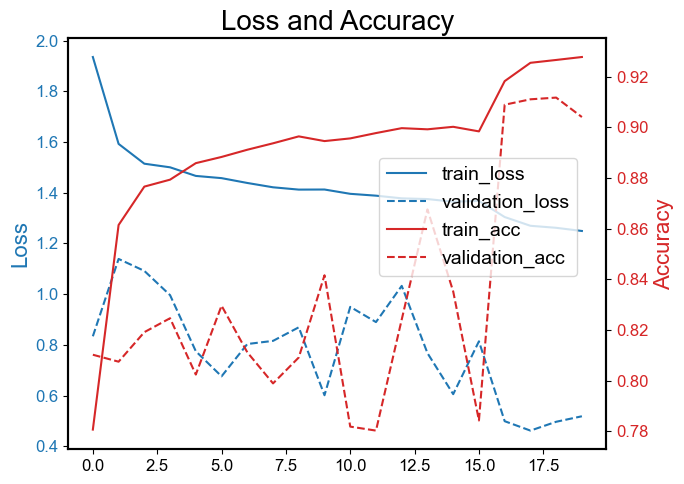


Iter best test accuracy under accuracy is: 0.9327795800189645


[INFO 04-10 15:24:56] ax.service.ax_client: Completed trial 18 with data: {'accuracy': (0.93278, None)}.


Iter best test accuracy under loss is: 0.934899041893895



[INFO 04-10 15:24:57] ax.service.ax_client: Generated new trial 19 with parameters {'lr': 0.004211, 'wgtDecay': 0.000395, 'lambda1': 1.3e-05, 'lambdaI': 0.001221, 'lambdaC': 0.097725} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 4048.0769 | acc: 0.7738|  Val loss: 38.1704 | acc: 0.8096| 

Epoch 6/20:
Train loss: 2626.4112 | acc: 0.9032|  Val loss: 27.6555 | acc: 0.8618| 

Epoch 11/20:
Train loss: 2174.6177 | acc: 0.9120|  Val loss: 34.1477 | acc: 0.8312| 

Epoch 16/20:
Train loss: 1933.7314 | acc: 0.9138|  Val loss: 23.1249 | acc: 0.8739| 
Finished Training  | Time:418.2621064186096


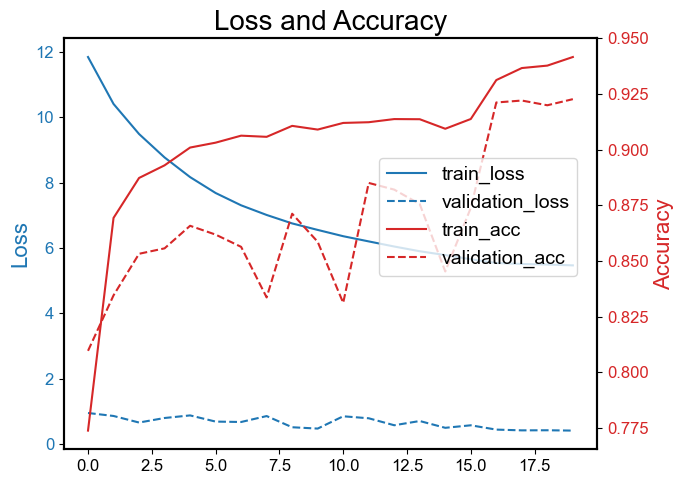


Iter best test accuracy under accuracy is: 0.9440879781425598


[INFO 04-10 15:31:58] ax.service.ax_client: Completed trial 19 with data: {'accuracy': (0.944088, None)}.


Iter best test accuracy under loss is: 0.9446469851028046



[INFO 04-10 15:31:59] ax.service.ax_client: Generated new trial 20 with parameters {'lr': 0.007287, 'wgtDecay': 0.000594, 'lambda1': 3.2e-05, 'lambdaI': 0.000443, 'lambdaC': 0.007998} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 588.6550 | acc: 0.7749|  Val loss: 41.6393 | acc: 0.7790| 

Epoch 6/20:
Train loss: 288.0892 | acc: 0.8829|  Val loss: 30.6121 | acc: 0.8446| 

Epoch 11/20:
Train loss: 251.3225 | acc: 0.8881|  Val loss: 31.2280 | acc: 0.8283| 

Epoch 16/20:
Train loss: 204.8114 | acc: 0.9224|  Val loss: 20.9723 | acc: 0.9127| 
Finished Training  | Time:417.91566491127014


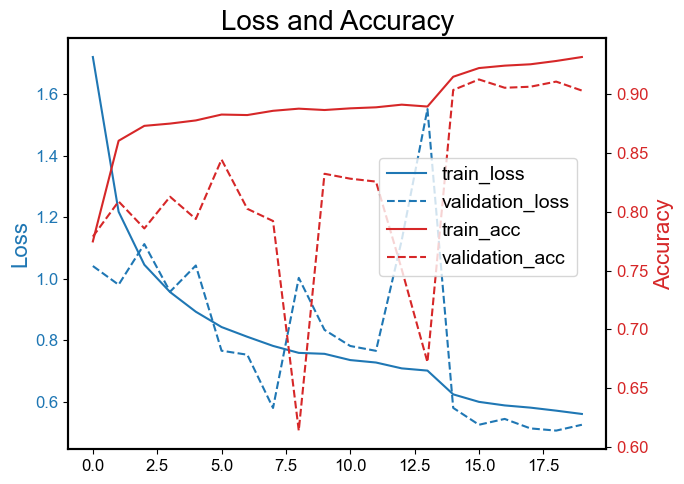


Iter best test accuracy under accuracy is: 0.9323841720739724


[INFO 04-10 15:39:00] ax.service.ax_client: Completed trial 20 with data: {'accuracy': (0.932384, None)}.


Iter best test accuracy under loss is: 0.9331647008901385



[INFO 04-10 15:39:01] ax.service.ax_client: Generated new trial 21 with parameters {'lr': 0.003304, 'wgtDecay': 6.9e-05, 'lambda1': 4e-06, 'lambdaI': 0.007765, 'lambdaC': 0.000612} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 456.4270 | acc: 0.7615|  Val loss: 45.4504 | acc: 0.8074| 

Epoch 6/20:
Train loss: 244.1500 | acc: 0.9102|  Val loss: 26.6847 | acc: 0.8782| 

Epoch 11/20:
Train loss: 223.0201 | acc: 0.9215|  Val loss: 25.3216 | acc: 0.8924| 

Epoch 16/20:
Train loss: 210.9223 | acc: 0.9282|  Val loss: 17.9989 | acc: 0.8841| 
Finished Training  | Time:418.311007976532


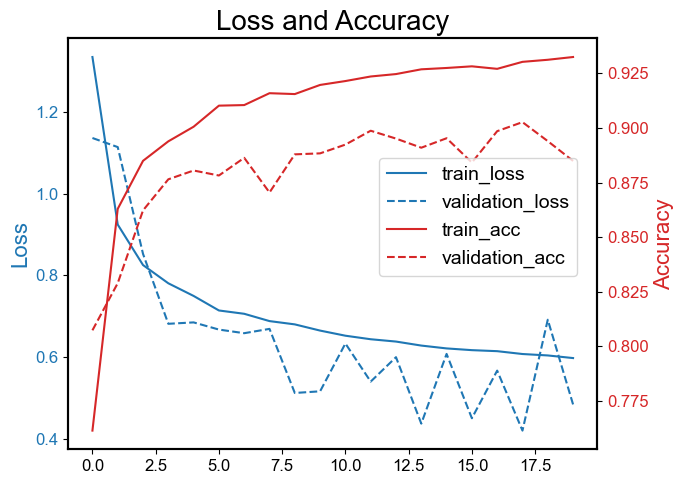


Iter best test accuracy under accuracy is: 0.910449739230863


[INFO 04-10 15:46:02] ax.service.ax_client: Completed trial 21 with data: {'accuracy': (0.91045, None)}.


Iter best test accuracy under loss is: 0.9103839534869268



[INFO 04-10 15:46:03] ax.modelbridge.base: Untransformed parameter 0.40000000000000013 greater than upper bound 0.4, clamping
[INFO 04-10 15:46:03] ax.service.ax_client: Generated new trial 22 with parameters {'lr': 0.005007, 'wgtDecay': 0.000512, 'lambda1': 3.9e-05, 'lambdaI': 0.001138, 'lambdaC': 0.4} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 15307.6420 | acc: 0.7735|  Val loss: 39.7905 | acc: 0.8160| 

Epoch 6/20:
Train loss: 8898.8294 | acc: 0.8937|  Val loss: 34.2887 | acc: 0.7963| 

Epoch 11/20:
Train loss: 7064.8533 | acc: 0.9012|  Val loss: 34.1754 | acc: 0.8050| 

Epoch 16/20:
Train loss: 6565.5877 | acc: 0.9324|  Val loss: 18.9804 | acc: 0.9133| 
Finished Training  | Time:417.4580183029175


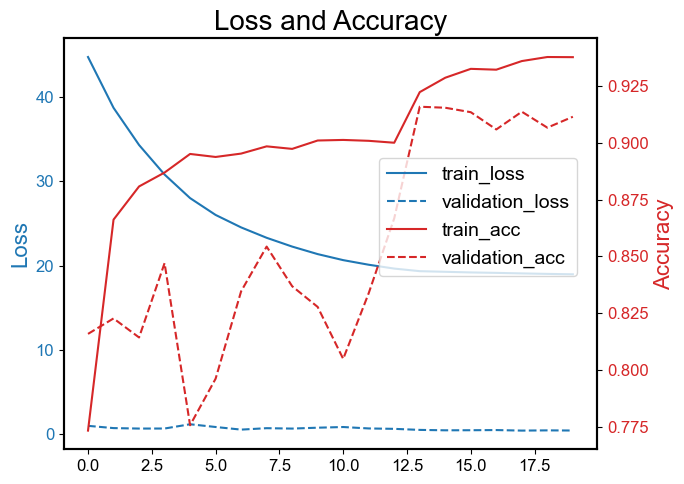


Iter best test accuracy under accuracy is: 0.9391347446407935


[INFO 04-10 15:53:03] ax.service.ax_client: Completed trial 22 with data: {'accuracy': (0.939135, None)}.


Iter best test accuracy under loss is: 0.9382955290532515



[INFO 04-10 15:53:04] ax.modelbridge.base: Untransformed parameter 0.40000000000000013 greater than upper bound 0.4, clamping
[INFO 04-10 15:53:04] ax.service.ax_client: Generated new trial 23 with parameters {'lr': 0.005647, 'wgtDecay': 0.000142, 'lambda1': 2.1e-05, 'lambdaI': 0.000384, 'lambdaC': 0.4} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 15671.5453 | acc: 0.7743|  Val loss: 40.9255 | acc: 0.7992| 

Epoch 6/20:
Train loss: 11713.7318 | acc: 0.9015|  Val loss: 32.5591 | acc: 0.8721| 

Epoch 11/20:
Train loss: 10446.0719 | acc: 0.9131|  Val loss: 26.8331 | acc: 0.8757| 

Epoch 16/20:
Train loss: 9742.5722 | acc: 0.9147|  Val loss: 19.2466 | acc: 0.8476| 
Finished Training  | Time:417.78904724121094


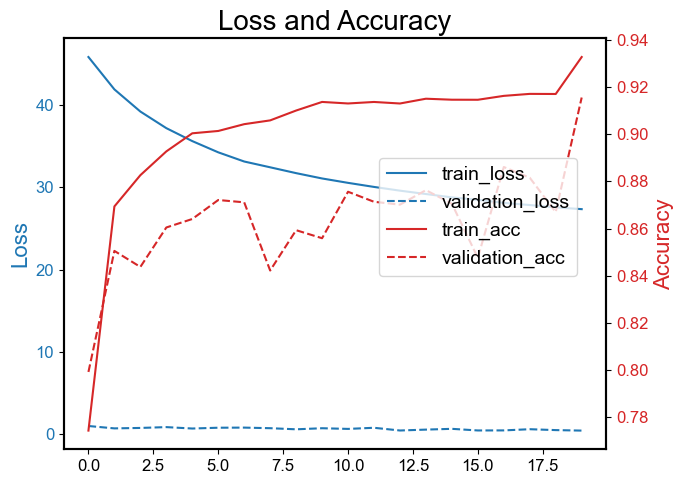


Iter best test accuracy under accuracy is: 0.9390384477716079


[INFO 04-10 16:00:05] ax.service.ax_client: Completed trial 23 with data: {'accuracy': (0.939038, None)}.


Iter best test accuracy under loss is: 0.9387553153519931



[INFO 04-10 16:00:06] ax.service.ax_client: Generated new trial 24 with parameters {'lr': 0.001817, 'wgtDecay': 0.000117, 'lambda1': 3.9e-05, 'lambdaI': 0.008012, 'lambdaC': 1e-06} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 507.7138 | acc: 0.7310|  Val loss: 50.3005 | acc: 0.7700| 

Epoch 6/20:
Train loss: 265.9768 | acc: 0.9002|  Val loss: 27.2518 | acc: 0.8618| 

Epoch 11/20:
Train loss: 240.0044 | acc: 0.9172|  Val loss: 26.9833 | acc: 0.8880| 

Epoch 16/20:
Train loss: 224.7875 | acc: 0.9272|  Val loss: 22.8708 | acc: 0.8771| 
Finished Training  | Time:417.8337833881378


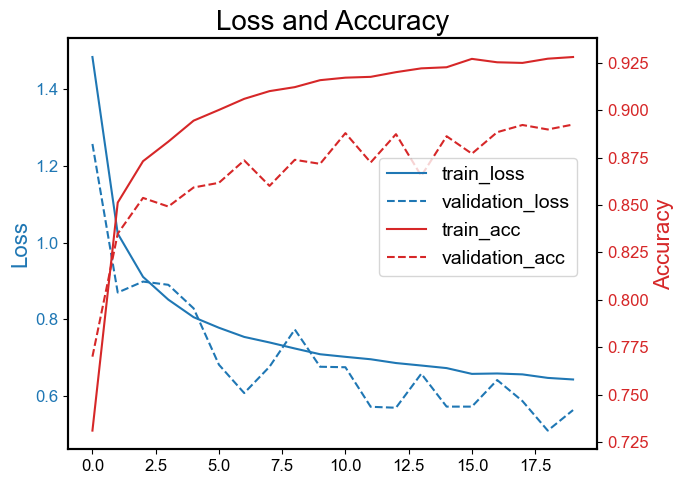


Iter best test accuracy under accuracy is: 0.9200262470239645


[INFO 04-10 16:07:07] ax.service.ax_client: Completed trial 24 with data: {'accuracy': (0.920026, None)}.


Iter best test accuracy under loss is: 0.9206390206843081



[INFO 04-10 16:07:08] ax.service.ax_client: Generated new trial 25 with parameters {'lr': 0.002286, 'wgtDecay': 0.000301, 'lambda1': 2.8e-05, 'lambdaI': 0.000573, 'lambdaC': 0.122392} using model BoTorch.


Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 5150.8723 | acc: 0.7524|  Val loss: 37.4718 | acc: 0.7978| 

Epoch 6/20:
Train loss: 3940.0549 | acc: 0.9033|  Val loss: 22.1555 | acc: 0.8691| 

Epoch 11/20:
Train loss: 3366.8407 | acc: 0.9182|  Val loss: 26.6735 | acc: 0.8888| 

Epoch 16/20:
Train loss: 3209.9469 | acc: 0.9401|  Val loss: 18.5672 | acc: 0.9131| 
Finished Training  | Time:418.3594126701355


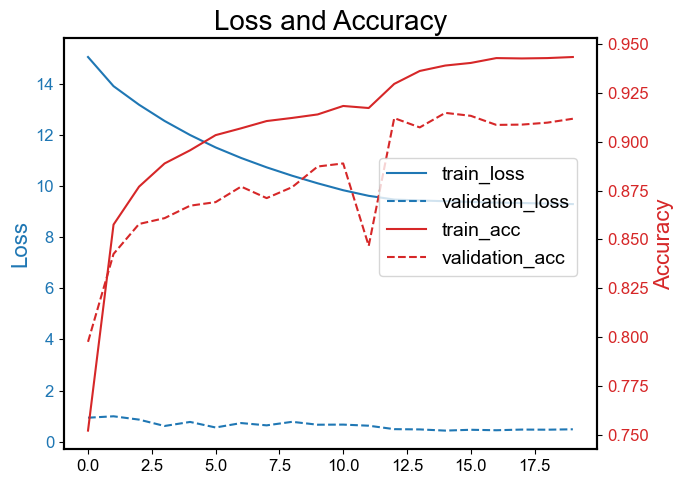


Iter best test accuracy under accuracy is: 0.9314401433886347


[INFO 04-10 16:14:09] ax.service.ax_client: Completed trial 25 with data: {'accuracy': (0.93144, None)}.


Iter best test accuracy under loss is: 0.9304471986831807



In [15]:
for i in range(25):
    parameters, trial_index = ax_client.get_next_trial()
    # Local evaluation here can be replaced with deployment to external system.
    ax_client.complete_trial(trial_index=trial_index, raw_data=train_eval_acc(parameters))

In [16]:
ax_client.get_max_parallelism()

[(10, 10), (-1, 3)]

In [17]:
ax_client.get_trials_data_frame()

[WARNING 04-10 16:14:09] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


trial_index arm_name trial_status generation_method  accuracy        lr  \
0             0      0_0    COMPLETED            Manual  0.914728  0.001000   
1             1      1_0    COMPLETED             Sobol  0.941749  0.004086   
2             2      2_0    COMPLETED             Sobol  0.939682  0.004774   
3             3      3_0    COMPLETED             Sobol  0.881836  0.000054   
4             4      4_0    COMPLETED             Sobol  0.872038  0.000096   
5             5      5_0    COMPLETED             Sobol  0.869595  0.000545   
6             6      6_0    COMPLETED             Sobol  0.703373  0.006533   
7             7      7_0    COMPLETED             Sobol  0.789072  0.002486   
8             8      8_0    COMPLETED             Sobol  0.930759  0.001764   
9             9      9_0    COMPLETED             Sobol  0.865768  0.000098   
10           10     10_0    COMPLETED             Sobol  0.675630  0.000009   
11           11     11_0    COMPLETED           BoTorch  0.912532  0.003743   
12           12     12_0    COMPLETED           BoTorch  0.924518  0.003643   
13           13     13_0    COMPLETED           BoTorch  0.936657  0.002432   
14           14     14_0    COMPLETED           BoTorch  0.909407  0.001657   
15           15     15_0    COMPLETED           BoTorch  0.923593  0.005708   
16           16     16_0    COMPLETED           BoTorch  0.927001  0.015665   
17           17     17_0    COMPLETED           BoTorch  0.937866  0.006315   
18           18     18_0    COMPLETED           BoTorch  0.932780  0.007872   
19           19     19_0    COMPLETED           BoTorch  0.944088  0.004211   
20           20     20_0    COMPLETED           BoTorch  0.932384  0.007287   
21           21     21_0    COMPLETED           BoTorch  0.910450  0.003304   
22           22     22_0    COMPLETED           BoTorch  0.939135  0.005007   
23           23     23_0    COMPLETED           BoTorch  0.939038  0.005647   
24           24     24_0    COMPLETED           BoTorch  0.920026  0.001817   
25           25     25_0    COMPLETED           BoTorch  0.931440  0.002286   

    wgtDecay   lambda1   lambdaI   lambdaC  
0   0.000100  0.000010  0.000100  0.000100  
1   0.000148  0.000102  0.000843  0.172008  
2   0.000006  0.000177  0.019667  0.003335  
3   0.000161  0.056748  0.038117  0.000001  
4   0.000003  0.002676  0.036058  0.012300  
5   0.364097  0.000199  0.000069  0.000108  
6   0.006072  0.021487  0.129220  0.000226  
7   0.287033  0.000125  0.000001  0.016439  
8   0.000006  0.000030  0.005670  0.000007  
9   0.000001  0.000004  0.000007  0.000016  
10  0.014552  0.000007  0.000312  0.001284  
11  0.000015  0.000042  0.000732  0.002946  
12  0.000020  0.000071  0.019983  0.374589  
13  0.000048  0.000051  0.028561  0.000821  
14  0.000058  0.000227  0.004450  0.012359  
15  0.000004  0.000026  0.101036  0.000344  
16  0.000115  0.000051  0.006958  0.040325  
17  0.000079  0.000020  0.006805  0.000015  
18  0.000015  0.000120  0.018711  0.000039  
19  0.000395  0.000013  0.001221  0.097725  
20  0.000594  0.000032  0.000443  0.007998  
21  0.000069  0.000004  0.007765  0.000612  
22  0.000512  0.000039  0.001138  0.400000  
23  0.000142  0.000021  0.000384  0.400000  
24  0.000117  0.000039  0.008012  0.000001  
25  0.000301  0.000028  0.000573  0.122392

In [18]:
best_parameters, values = ax_client.get_best_parameters()
best_parameters

[WARNING 04-10 16:14:09] ax.modelbridge.cross_validation: Metric accuracy was unable to be reliably fit.
[WARNING 04-10 16:14:09] ax.service.utils.best_point: Model fit is poor; falling back on raw data for best point.
[WARNING 04-10 16:14:09] ax.service.utils.best_point: Model fit is poor and data on objective metric accuracy is noisy; interpret best points results carefully.


{'lr': 0.004210999933629988,
 'wgtDecay': 0.00039540889657373266,
 'lambda1': 1.3274101361724017e-05,
 'lambdaI': 0.0012210455505313055,
 'lambdaC': 0.09772541982958126}

In [19]:
mean, covariance = values
mean

{'accuracy': 0.9440879781425598}

In [20]:
df = ax_client.get_trials_data_frame()
best_arm_idx = df.trial_index[df["accuracy"] == df["accuracy"].max()].values[0]
best_arm = ax_client.get_trial_parameters(best_arm_idx)
best_arm

[WARNING 04-10 16:14:09] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


{'lr': 0.004210999933629988,
 'wgtDecay': 0.00039540889657373266,
 'lambda1': 1.3274101361724017e-05,
 'lambdaI': 0.0012210455505313055,
 'lambdaC': 0.09772541982958126}

The accuracy with tuned parameters will be higher than pre-defined parameters, but the DSF_BPF frequency response will showcase overlapping channels (same frequency information will be colected by more than one channels). Thus, auto channel pruning will be part of our future work.

Perform LearnAFE_v2 Model Architecture


Model iter: 1/1...

Model Reset

Training for 20 epochs...


Epoch 1/20:
Train loss: 4041.8098 | acc: 0.7721|  Val loss: 50.4523 | acc: 0.8195| 

Epoch 6/20:
Train loss: 2585.5943 | acc: 0.9001|  Val loss: 33.3166 | acc: 0.8535| 

Epoch 11/20:
Train loss: 2114.6543 | acc: 0.9091|  Val loss: 25.4715 | acc: 0.8858| 

Epoch 16/20:
Train loss: 1892.6190 | acc: 0.9356|  Val loss: 17.8210 | acc: 0.9172| 
Finished Training  | Time:422.39541506767273


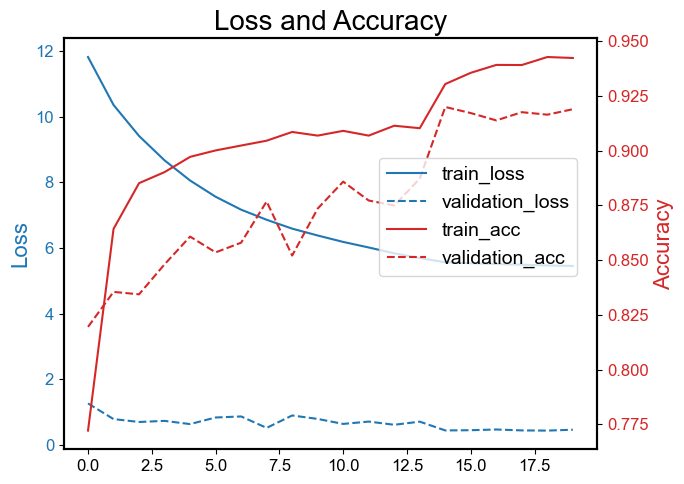


Iter best test accuracy under accuracy is: 0.9379495290238465
Iter best test accuracy under loss is: 0.937691231742551



0.9379495290238465

In [21]:
# Train and Evaluate using the best parameters
train_eval_acc(best_arm)

#### [Back to List of Content](#list_of_content)

---

### Step 6. KWS Model Testing <a id="kws-model-testing"></a>

Test trained-model without adding noise. Here, the DSSF-BPF model is using transfer function with formulation stated in [(3)](#eq3). 

Here, we adopted the model with pre-defined hyperparameters. It is same as running this `Step` directly after `Step 4`.

In [8]:
STRATEGY = "accuracy"
PATH = os.path.join(args.save_folder, "Trial-{}_Val-{}.pt".format(args.trial, args.Val_SNR))

CheckPoint = torch.load(PATH)
KWS_classifier = getModel(args.model, args)
KWS_classifier.load_state_dict(
    CheckPoint[STRATEGY]["model_state_dict"]
)
KWS_classifier.cuda().eval()
print("KWS model is switched to evaluation mode")

KWS model is switched to evaluation mode



Train Testing...

Evaluating....
Accuracy: 0.9558830943982427
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7322
           1       0.96      0.97      0.97      7392
           2       0.95      0.97      0.96      7350
           3       0.95      0.95      0.95      7187
           4       0.96      0.96      0.96      7267
           5       0.95      0.97      0.96      7413
           6       0.96      0.97      0.96      7306
           7       0.97      0.97      0.97      7265
           8       0.95      0.97      0.96      7286
           9       0.96      0.97      0.97      7266
          10       0.90      0.82      0.86      7175
          11       0.98      1.00      0.99      7323

    accuracy                           0.96     87552
   macro avg       0.96      0.96      0.96     87552
weighted avg       0.96      0.96      0.96     87552

Visualizing...
Normalized confusion matrix



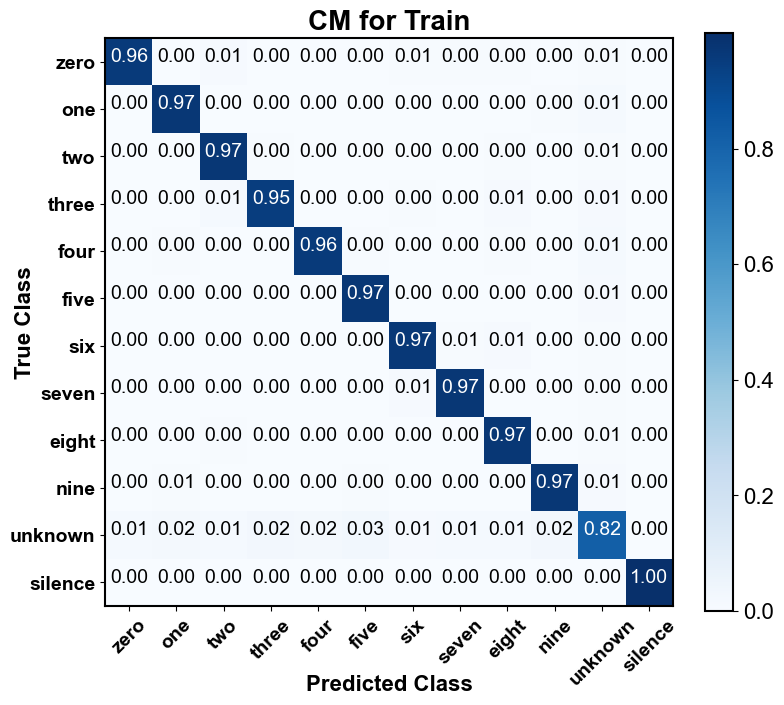

In [12]:
print("\nTrain Testing...")

train_accuracy, truth, preds = test_model(
    device=DEVICE,
    dataloader=KWS_DataLoader["train"],
    trained_model=KWS_classifier, 
    feature_transform=DATA_AUGMENTATION["test"], 
    verbose=True,
)
cm = confusion_matrix(y_true=truth, y_pred=preds)
vs.plot_confusion_matrix(cm=cm, normalize=True, classes=CLASSES, title="CM for Train")


Valid Testing...

Evaluating....
Accuracy: 0.938174943176448
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       384
           1       0.67      0.93      0.78       351
           2       0.82      0.97      0.89       345
           3       0.66      0.94      0.78       356
           4       0.68      0.94      0.78       373
           5       0.62      0.93      0.74       367
           6       0.85      0.93      0.89       378
           7       0.75      0.96      0.84       387
           8       0.84      0.96      0.89       346
           9       0.68      0.95      0.79       356
          10       0.98      0.82      0.89      6338
          11       0.97      1.00      0.98       259

    accuracy                           0.87     10240
   macro avg       0.78      0.94      0.85     10240
weighted avg       0.90      0.87      0.87     10240

Visualizing...
Normalized confusion matrix



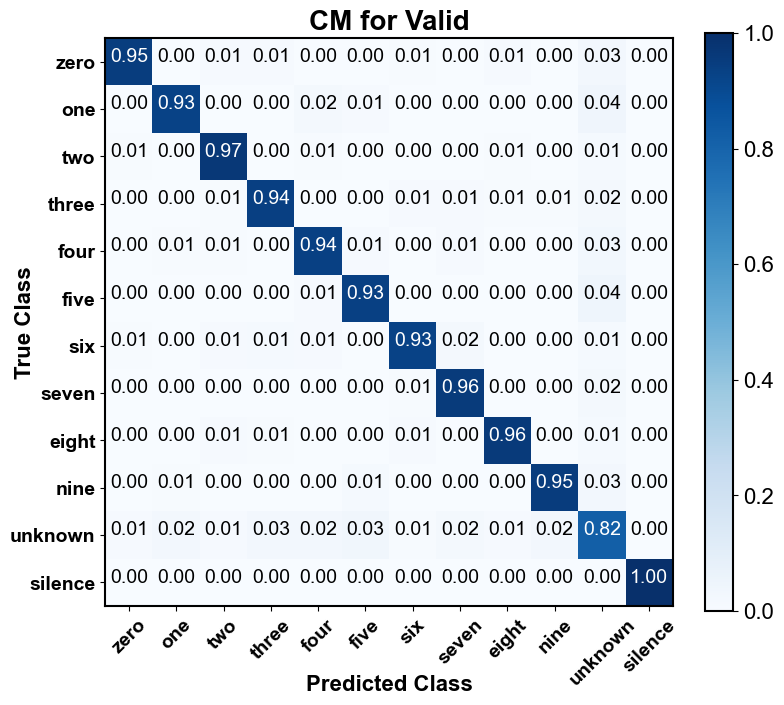

In [13]:
print("\nValid Testing...")

valid_accuracy, truth, preds = test_model(
    device=DEVICE,
    dataloader=KWS_DataLoader["val"],
    trained_model=KWS_classifier,
    feature_transform=DATA_AUGMENTATION["test"], 
    verbose=True,
)
cm = confusion_matrix(y_true=truth, y_pred=preds)
vs.plot_confusion_matrix(cm=cm, normalize=True, classes=CLASSES, title="CM for Valid")


Test Testing...

Evaluating....
Accuracy: 0.9266976727395742
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       418
           1       0.75      0.90      0.82       399
           2       0.77      0.94      0.84       424
           3       0.67      0.92      0.78       405
           4       0.65      0.89      0.75       400
           5       0.71      0.93      0.80       445
           6       0.86      0.93      0.89       394
           7       0.75      0.96      0.84       406
           8       0.83      0.95      0.88       408
           9       0.69      0.93      0.79       408
          10       0.98      0.83      0.90      6898
          11       0.96      1.00      0.98       259

    accuracy                           0.87     11264
   macro avg       0.78      0.93      0.84     11264
weighted avg       0.89      0.87      0.87     11264

Visualizing...
Normalized confusion matrix



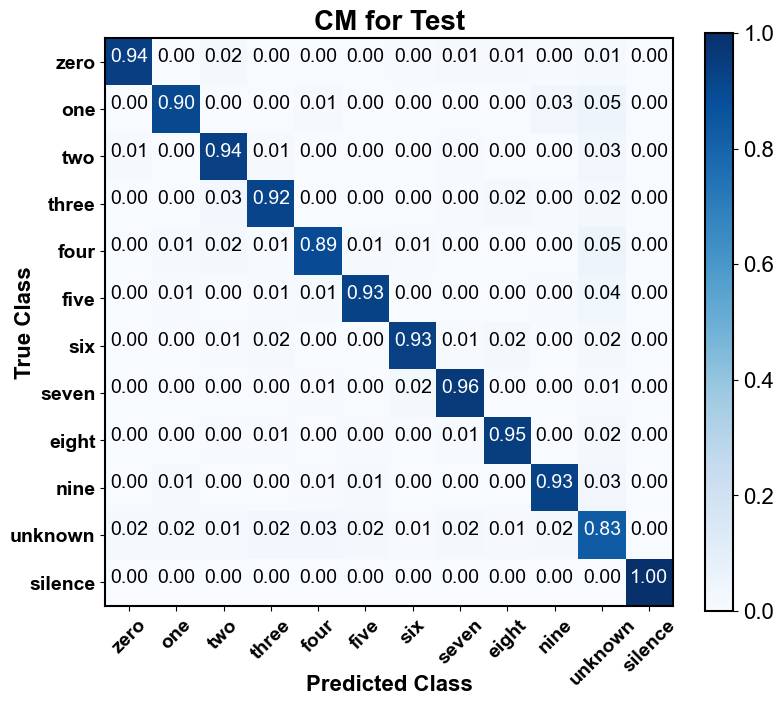

In [136]:
print("\nTest Testing...")

test_accuracy, truth, preds = test_model(
    device=DEVICE,
    dataloader=KWS_DataLoader["test"],
    trained_model=KWS_classifier, 
    feature_transform=DATA_AUGMENTATION["test"], 
    verbose=True,
)
cm = confusion_matrix(y_true=truth, y_pred=preds)
vs.plot_confusion_matrix(cm=cm, normalize=True, classes=CLASSES, title="CM for Test")

In [18]:
# log results
log_msg = (
    f"Test  - Model: {args.model}. "
    f"Strategy: {STRATEGY}, "
    f"Train Accuracy: {train_accuracy:>0.3f}, "
    f"Valid Accuracy: {valid_accuracy:>0.3f}, "
    f"Test Accuracy: {test_accuracy:>0.3f}"
)
logger.info(log_msg)

#### [Back to List of Content](#list_of_content)

---

### Step 7. SNR Evaluation <a id="snr-evaluation"></a>

Evaluate SNR-aware training performance on testset.

In [15]:
def snr_eval(
    device, 
    dataloader, 
    trained_model, 
    feature_transform, 
    snr_min, 
    snr_max, 
    snr_step=1, 
    verbose=False,
):
    snr_dict = dict.fromkeys(np.arange(snr_min, snr_max+1, snr_step))
    for snr in snr_dict.keys():
        feature_transform[0].snr_min = snr
        feature_transform[0].snr_max = snr + snr_step
        feature_transform[0].p = 1.0
        test_acc, *_ = test_model(
            device=device,
            dataloader=dataloader,
            trained_model=trained_model,
            feature_transform=feature_transform, 
        )
        snr_dict[snr] = test_acc

    feature_transform[0].p = 0.0
    test_acc, *_ = test_model(
            device=device,
            dataloader=dataloader,
            trained_model=trained_model,
            feature_transform=feature_transform, 
    )
    snr_dict["clean"] = test_acc

    if verbose:
        vs.plot_snr(snr_dict.copy())
        
    return snr_dict

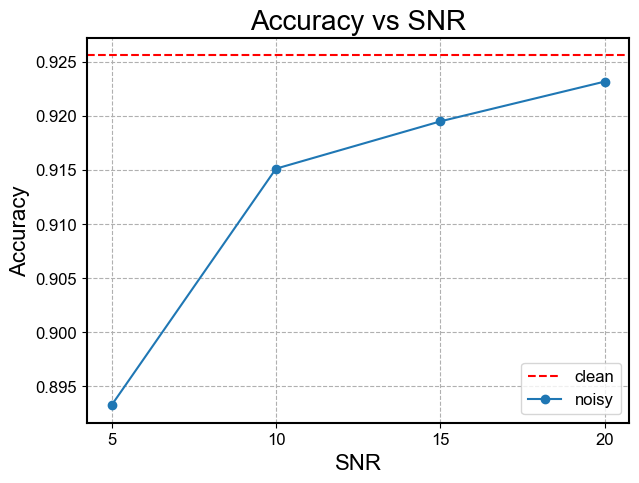

In [16]:
snr_dict = snr_eval(
    device=DEVICE,
    dataloader=KWS_DataLoader["test"],
    trained_model=KWS_classifier, 
    feature_transform=DATA_AUGMENTATION["test"], 
    snr_min=5,
    snr_max=20,
    snr_step=5,
    verbose=True,
)

In [21]:
# log SNR results
log_msg = (
    f"Eval  - Model: {args.model}. "
    f"Strategy: {STRATEGY}, "
    f"5db Accuracy: {snr_dict[5]:>0.3f}, "
    f"20db Accuracy: {snr_dict[20]:>0.3f}, "
    f"clean Accuracy: {snr_dict['clean']:>0.3f}"
)
logger.info(log_msg)

#### [Back to List of Content](#list_of_content)

---

### Step 8. Filter Visualization <a id="filter-visualization"></a>

Visualize BPF frequency response in log- and linear- frequency scale.

In [9]:
def plot_filter(model, args):
    if args.model != "LearnAFE_v2":
        print("Only LearnAFE has learnable analog filter")
        return
    
    x = torch.linspace(10, 10000, args.n_fft//2+1)
    x_log = torch.logspace(1, 4, args.n_fft//2+1)

    C1 = model.bpf.C1.detach().cpu()
    Cr = model.bpf.Cr.detach().cpu()
    Cr = torch.clamp(Cr, 1.0)
    C2 = C1 * Cr

    gm1 = model.bpf.gm1.detach().cpu()
    Ir = model.bpf.Ir.detach().cpu()
    Ir = torch.clamp(Ir, 1.7, 3.0)
    gm2 = (Ir - 1) * (gm1 * 0.059) / 0.038

    w = x * torch.tensor(2*torch.pi*1j, dtype=torch.complex64)
    w_log = x_log * torch.tensor(2*torch.pi*1j, dtype=torch.complex64)
    a1 = (gm1 / (2*C1)).unsqueeze(1)
    b1 = (gm1 / (2*C2)).unsqueeze(1)
    b0 = (gm1 * gm2 / (4 * C1 * C2)).unsqueeze(1)

    h = - a1 * w / (w**2 + b1 * w + b0)
    abs_h = torch.abs(h)
    fb = (abs_h - abs_h.min()) / (abs_h.max() - abs_h.min())
    fb = fb.T

    h_log = - a1 * w_log / (w_log**2 + b1 * w_log + b0)
    abs_h_log = torch.abs(h_log)
    fb_log = (abs_h_log - abs_h_log.min()) / (abs_h_log.max() - abs_h_log.min())
    fb_log = fb_log.T

    fc = torch.sqrt(b0) / (2 * torch.pi)
    Q = torch.sqrt((gm2 * C2) / (gm1 * C1))
    A = C2 / C1
    print('fc', fc.flatten())
    print('Q', Q, Q.mean())
    print('A', A)
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].semilogx(x_log.numpy(), fb_log.numpy(), linewidth=2)
    ax[0].set_ylabel('Gain', fontsize=14)
    ax[0].set_title('Learned Analog Filter', fontsize=16)
    ax[0].grid(which='both', axis='both')
    ax[1].plot(fb.numpy(), linewidth=2)
    ax[1].set_xlabel('Frequency [Hz]', fontsize=14)
    ax[1].set_ylabel('Gain', fontsize=14)
    ax[1].grid(which='both', axis='both')
    plt.show()

Besides plotting frequncy response of 16-channel BPF, the central freqncy `fc`, Q-factor `Q` and normalized gain `A` of each channel are printed.

fc tensor([  77.7339,  106.8848,  151.8083,  198.1087,  248.1626,  320.5541,
         407.1005,  529.1579,  697.9562,  911.7384, 1133.3756, 1462.9143,
        1895.9562, 2501.1062, 3273.2549, 5274.8975])
Q tensor([1.7421, 2.8164, 3.7362, 4.0019, 4.2271, 4.2968, 4.3408, 4.4407, 4.4040,
        4.3946, 4.4097, 4.5060, 4.3485, 4.0904, 3.5501, 3.6434]) tensor(3.9343)
A tensor([3.0696, 4.6847, 5.6795, 6.0508, 6.6226, 6.7645, 6.9846, 7.1354, 6.9637,
        6.9047, 7.2345, 7.4340, 7.1851, 6.6502, 5.7244, 4.7319])


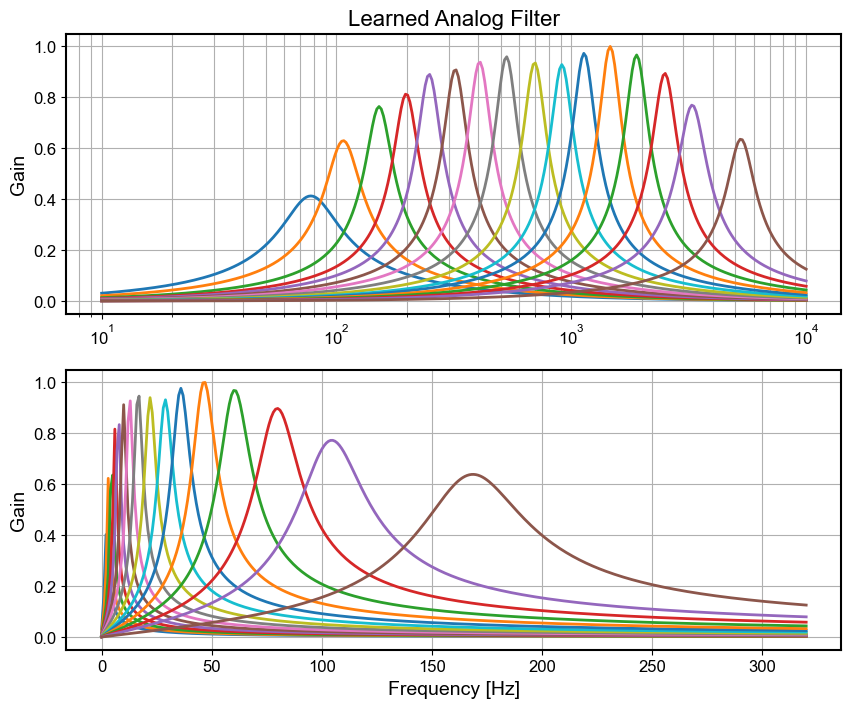

In [10]:
plot_filter(KWS_classifier, args)

#### [Back to List of Content](#list_of_content)

---

### Step 9. SPICE Verification-AC <a id="spice-verification-ac"></a>

In [180]:
assert args.model == "LearnAFE_v2", "SPICE verification only available for LearnAFE_v2"

Config netlist for 16 channels 

In [15]:
netlist_dict_AC = {
    0: (
        "I_2_1", "W_C1_1", "L_C1_1", "I_1_1", "W_C2_1", "L_C2_1",
        "I_1_1", 2, "I_2_1", 1, "W_C1_1", 100, "L_C1_1", 100, "W_C2_1", 100, "L_C2_1", 100,
        "DSF_BPF_AC1"
    ),
    1: (
        "I_2_2", "W_C1_2", "L_C1_2", "I_1_2", "W_C2_2", "L_C2_2",
        "I_1_2", 2.6, "I_2_2", 1.3, "W_C1_2", 100, "L_C1_2", 100, "W_C2_2", 100, "L_C2_2", 100,
        "DSF_BPF_AC2"
    ),
    2: (
        "I_2_3", "W_C1_3", "L_C1_3", "I_1_3", "W_C2_3", "L_C2_3",
        "I_1_3", 3.37, "I_2_3", 1.69, "W_C1_3", 100, "L_C1_3", 100, "W_C2_3", 100, "L_C2_3", 100,
        "DSF_BPF_AC3"
    ),
    3: (
        "I_2_4", "W_C1_4", "L_C1_4", "I_1_4", "W_C2_4", "L_C2_4",
        "I_1_4", 4.38, "I_2_4", 2.19, "W_C1_4", 100, "L_C1_4", 100, "W_C2_4", 100, "L_C2_4", 100,
        "DSF_BPF_AC4"
    ),
    4: (
        "I_2_5", "W_C1_5", "L_C1_5", "I_1_5", "W_C2_5", "L_C2_5",
        "I_1_5", 5.68, "I_2_5", 2.84, "W_C1_5", 100, "L_C1_5", 100, "W_C2_5", 100, "L_C2_5", 100,
        "DSF_BPF_AC5"
    ),
    5: (
        "I_2_6", "W_C1_6", "L_C1_6", "I_1_6", "W_C2_6", "L_C2_6",
        "I_1_6", 7.38, "I_2_6", 3.69, "W_C1_6", 100, "L_C1_6", 100, "W_C2_6", 100, "L_C2_6", 100,
        "DSF_BPF_AC6"
    ),
    6: (
        "I_2_7", "W_C1_7", "L_C1_7", "I_1_7", "W_C2_7", "L_C2_7",
        "I_1_7", 9.58, "I_2_7", 4.79, "W_C1_7", 100, "L_C1_7", 100, "W_C2_7", 100, "L_C2_7", 100,
        "DSF_BPF_AC7"
    ),
    7: (
        "I_2_8", "W_C1_8", "L_C1_8", "I_1_8", "W_C2_8", "L_C2_8",
        "I_1_8", 12.45, "I_2_8", 6.22, "W_C1_8", 100, "L_C1_8", 100, "W_C2_8", 100, "L_C2_8", 100,
        "DSF_BPF_AC8"
    ),
    8: (
        "I_2_9", "W_C1_9", "L_C1_9", "I_1_9", "W_C2_9", "L_C2_9",
        "I_1_9", 16.16, "I_2_9", 8.08, "W_C1_9", 100, "L_C1_9", 100, "W_C2_9", 100, "L_C2_9", 100,
        "DSF_BPF_AC9"
    ),
    9: (
        "I_2_10", "W_C1_10", "L_C1_10", "I_1_10", "W_C2_10", "L_C2_10",
        "I_1_10", 20.98, "I_2_10", 10.49, "W_C1_10", 100, "L_C1_10", 100, "W_C2_10", 100, "L_C2_10", 100,
        "DSF_BPF_AC10"
    ),
    10: (
        "I_2_11", "W_C1_11", "L_C1_11", "I_1_11", "W_C2_11", "L_C2_11",
        "I_1_11", 27.23, "I_2_11", 13.61, "W_C1_11", 100, "L_C1_11", 100, "W_C2_11", 100, "L_C2_11", 100,
        "DSF_BPF_AC11"
    ),
    11: (
        "I_2_12", "W_C1_12", "L_C1_12", "I_1_12", "W_C2_12", "L_C2_12",
        "I_1_12", 35.36, "I_2_12", 17.68, "W_C1_12", 100, "L_C1_12", 100, "W_C2_12", 100, "L_C2_12", 100,
        "DSF_BPF_AC12"
    ),
    12: (
        "I_2_13", "W_C1_13", "L_C1_13", "I_1_13", "W_C2_13", "L_C2_13",
        "I_1_13", 45.92, "I_2_13", 22.96, "W_C1_13", 100, "L_C1_13", 100, "W_C2_13", 100, "L_C2_13", 100,
        "DSF_BPF_AC13"
    ),
    13: (
        "I_2_14", "W_C1_14", "L_C1_14", "I_1_14", "W_C2_14", "L_C2_14",
        "I_1_14", 59.64, "I_2_14", 29.82, "W_C1_14", 100, "L_C1_14", 100, "W_C2_14", 100, "L_C2_14", 100,
        "DSF_BPF_AC14"
    ),
    14: (
        "I_2_15", "W_C1_15", "L_C1_15", "I_1_15", "W_C2_15", "L_C2_15",
        "I_1_15", 77.43, "I_2_15", 38.72, "W_C1_15", 100, "L_C1_15", 100, "W_C2_15", 100, "L_C2_15", 100,
        "DSF_BPF_AC15"
    ),
    15: (
        "I_2_16", "W_C1_16", "L_C1_16", "I_1_16", "W_C2_16", "L_C2_16",
        "I_1_16", 100.55, "I_2_16", 50.27, "W_C1_16", 100, "L_C1_16", 100, "W_C2_16", 100, "L_C2_16", 100,
        "DSF_BPF_AC16"
    ),
}

Generate `para.spice` with initial and learned AFE parameters

In [12]:
def gen_netlist_para(classifier, args, mode):
    afe_config ={}
    path = 'AFE_Config/Design/' + args.afe_design + '.txt'
    with open(path, 'r') as file:
        for line in file:
            name, value = line.strip().split('\t')
            afe_config[name] = float(value)
    power = torch.arange(0, args.n_filter)

    if mode == "initial":
        I2 = torch.tensor(afe_config['I2'] / 1000) * torch.tensor(afe_config['scale']).pow(power)
        Ir = torch.tensor(afe_config['I1'] / afe_config['I2'])
        I1 = Ir * I2
        W_C1 = torch.full((args.n_filter, ), afe_config['C1_W'])
        W_C2 = torch.full((args.n_filter, ), afe_config['C2_W'])
    elif mode == "learned":
        I2 = classifier.bpf.gm1.detach().cpu().numpy() * 0.059 / 1000
        Ir = torch.clamp(classifier.bpf.Ir, 1.7, 3.0)
        I1 = I2 * Ir.detach().cpu().numpy()
        C1 = classifier.bpf.C1.detach().cpu().numpy()
        Cr = torch.clamp(classifier.bpf.Cr, 1.0)
        C2 = C1 * Cr.detach().cpu().numpy()
        W_C1 = np.sqrt(C1 * 1000 / 2)
        W_C2 = np.sqrt(C2 * 1000 / 2)

    return tuple(np.vstack((I1, I2, W_C1, W_C1, W_C2, W_C2)).T.flatten()) 

In [13]:
init_netlist_para_AC = gen_netlist_para(KWS_classifier, args, "initial")
learned_netlist_para_AC = gen_netlist_para(KWS_classifier, args, "learned")

Run `mdl.DSF_SpiceAC` to get initial filter frequency response `init_fb`

In [52]:
DSF_Spice = mdl.DSF_SpiceAC(
    n_filter=args.n_filter,
    sample_rate=args.new_sr,
    netlist_dict=netlist_dict_AC,
    netlist_para=init_netlist_para_AC,
    spice_path="AFE_Config/SpiceAC",
).to(DEVICE)

init_fb = DSF_Spice.fb.detach().cpu().numpy()

Writing AFE_Config/SpiceAC/para.spice

Running simulation on DSF_BPF_ch1 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 4001
 

Running simulation on DSF_BPF_ch2 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 4001
 

Running simulation on DSF_BPF_ch3 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1

In [53]:
KWS_Spice = mdl.LAFE_Spice_v1(
    n_filter=args.n_filter,
    sample_rate=args.new_sr,
    netlist_dict=netlist_dict_AC,
    netlist_para=learned_netlist_para_AC,
    spice_path="AFE_Config/SpiceAC",
    config_path=args.afe_design,
    hop_length=args.hop_length,
    overlap=args.overlap,
    max_sample_len=args.max_samples,
    backbone=mdl.DSCNN(args.num_classes),
).to(DEVICE)

learned_fb = KWS_Spice.bpf.fb.detach().cpu().numpy()

Writing AFE_Config/SpiceAC/para.spice

Running simulation on DSF_BPF_ch1 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 4001
 

Running simulation on DSF_BPF_ch2 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 4001
 

Running simulation on DSF_BPF_ch3 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1

In [203]:
ImKeys, UeKeys = KWS_Spice.load_state_dict(KWS_classifier.state_dict(), strict=False)


Test Testing...

Evaluating....
Accuracy: 0.9257868065296764
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       418
           1       0.78      0.88      0.83       399
           2       0.77      0.94      0.85       424
           3       0.66      0.92      0.77       405
           4       0.65      0.88      0.75       400
           5       0.74      0.93      0.82       445
           6       0.84      0.94      0.89       394
           7       0.72      0.97      0.82       406
           8       0.79      0.95      0.86       408
           9       0.64      0.95      0.77       408
          10       0.98      0.82      0.90      6898
          11       0.97      1.00      0.98       259

    accuracy                           0.87     11264
   macro avg       0.78      0.93      0.84     11264
weighted avg       0.89      0.87      0.87     11264

Visualizing...
Normalized confusion matrix



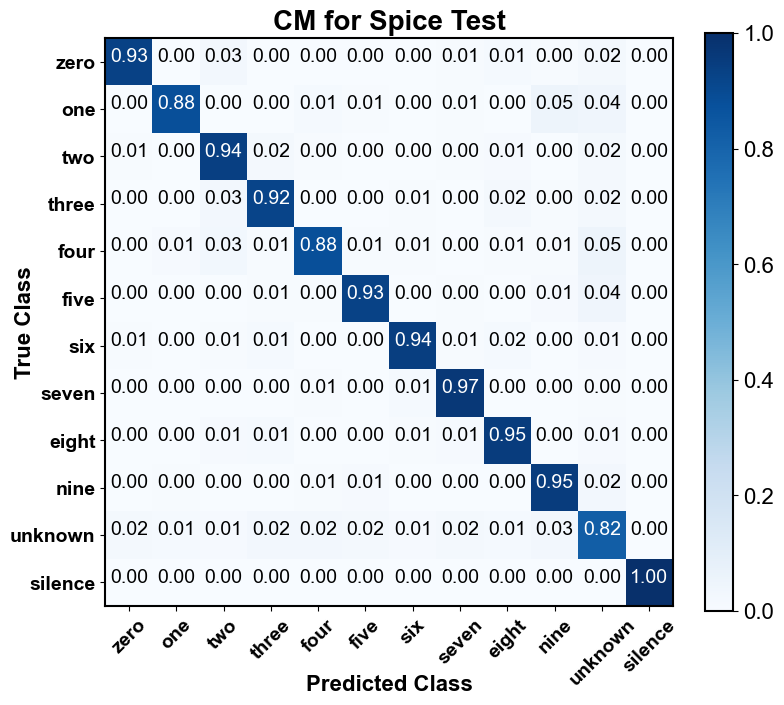

In [205]:
print("\nTest Testing...")

spice_accuracy, spice_truth, spice_preds = test_model(
    device=DEVICE,
    dataloader=KWS_DataLoader["test"],
    trained_model=KWS_Spice, 
    feature_transform=DATA_AUGMENTATION["test"], 
    verbose=True,
)
cm_spice = confusion_matrix(y_true=spice_truth, y_pred=spice_preds)
vs.plot_confusion_matrix(cm=cm_spice, normalize=True, classes=CLASSES, title="CM for Spice Test")

The accuracy drop is less than 0.5% using SPICE simulation. Here, test_accuracy is obtained in Step. 5 with ideal transfer function; while spice_accuracy is obtained with SPICE simulation on AC response.

In [206]:
spice_accuracy, test_accuracy

(0.9257868065296764, 0.9266976727395742)

Plot frequency response of filters with SPICE. The top figure is the initialization before training, while the bottom one is after training.

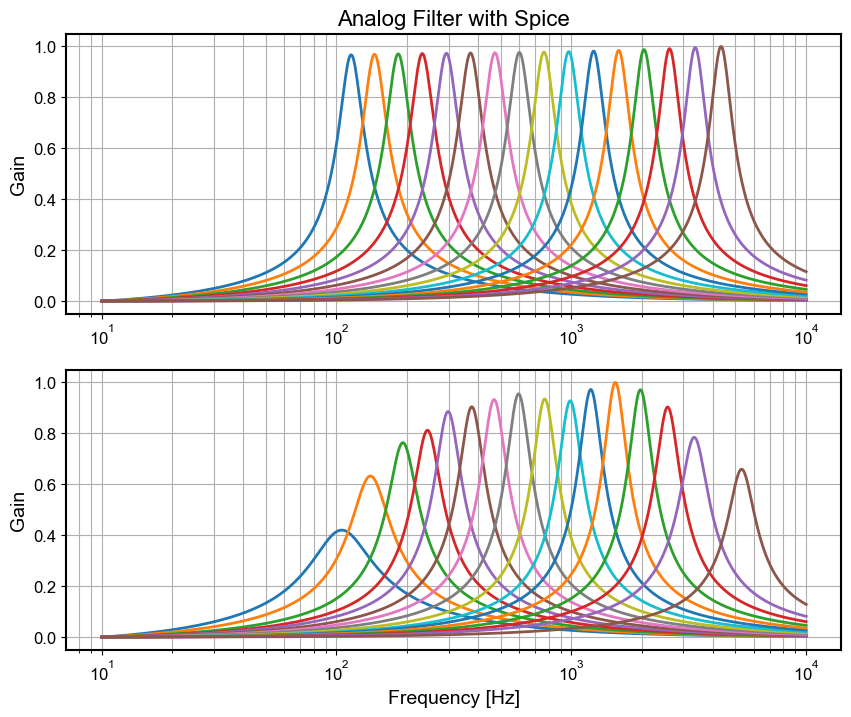

In [207]:
x = torch.linspace(10, 10000, 10001)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].semilogx(x, init_fb.T, linewidth=2)
ax[0].set_ylabel('Gain', fontsize=14)
ax[0].set_title('Analog Filter with Spice', fontsize=16)
ax[0].grid(which='both', axis='both')
ax[1].semilogx(x, learned_fb.T, linewidth=2)
ax[1].set_xlabel('Frequency [Hz]', fontsize=14)
ax[1].set_ylabel('Gain', fontsize=14)
ax[1].grid(which='both', axis='both')
plt.show()

#### [Back to List of Content](#list_of_content)

---

### Step 10. SPICE Verification-Trans <a id="spice-verification-trans"></a>

In [17]:
assert args.model == "LearnAFE_v2", "SPICE verification only available for LearnAFE_v2"

In [49]:
%%writefile AFE_Config/SpiceTrans/.spiceinit
* ngspice initialization for sky130
set ngbehavior=hsa
* "nomodcheck" speeds up loading time
set ng_nomodcheck
set num_threads=8

Overwriting AFE_Config/SpiceTrans/.spiceinit


In [19]:
netlist_dict_Trans = {
    0: (
        "I_2_1", "W_C1_1", "L_C1_1", "I_1_1", "W_C2_1", "L_C2_1",
        "I_1_1", 2, "I_2_1", 1, "W_C1_1", 100, "L_C1_1", 100, "W_C2_1", 100, "L_C2_1", 100,
        "input_voltage.txt", "DSF_BPF_Trans1"
    ),
    1: (
        "I_2_2", "W_C1_2", "L_C1_2", "I_1_2", "W_C2_2", "L_C2_2",
        "I_1_2", 2.6, "I_2_2", 1.3, "W_C1_2", 100, "L_C1_2", 100, "W_C2_2", 100, "L_C2_2", 100,
        "input_voltage.txt", "DSF_BPF_Trans2"
    ),
    2: (
        "I_2_3", "W_C1_3", "L_C1_3", "I_1_3", "W_C2_3", "L_C2_3",
        "I_1_3", 3.37, "I_2_3", 1.69, "W_C1_3", 100, "L_C1_3", 100, "W_C2_3", 100, "L_C2_3", 100,
        "input_voltage.txt", "DSF_BPF_Trans3"
    ),
    3: (
        "I_2_4", "W_C1_4", "L_C1_4", "I_1_4", "W_C2_4", "L_C2_4",
        "I_1_4", 4.38, "I_2_4", 2.19, "W_C1_4", 100, "L_C1_4", 100, "W_C2_4", 100, "L_C2_4", 100,
        "input_voltage.txt", "DSF_BPF_Trans4"
    ),
    4: (
        "I_2_5", "W_C1_5", "L_C1_5", "I_1_5", "W_C2_5", "L_C2_5",
        "I_1_5", 5.68, "I_2_5", 2.84, "W_C1_5", 100, "L_C1_5", 100, "W_C2_5", 100, "L_C2_5", 100,
        "input_voltage.txt", "DSF_BPF_Trans5"
    ),
    5: (
        "I_2_6", "W_C1_6", "L_C1_6", "I_1_6", "W_C2_6", "L_C2_6",
        "I_1_6", 7.38, "I_2_6", 3.69, "W_C1_6", 100, "L_C1_6", 100, "W_C2_6", 100, "L_C2_6", 100,
        "input_voltage.txt", "DSF_BPF_Trans6"
    ),
    6: (
        "I_2_7", "W_C1_7", "L_C1_7", "I_1_7", "W_C2_7", "L_C2_7",
        "I_1_7", 9.58, "I_2_7", 4.79, "W_C1_7", 100, "L_C1_7", 100, "W_C2_7", 100, "L_C2_7", 100,
        "input_voltage.txt", "DSF_BPF_Trans7"
    ),
    7: (
        "I_2_8", "W_C1_8", "L_C1_8", "I_1_8", "W_C2_8", "L_C2_8",
        "I_1_8", 12.45, "I_2_8", 6.22, "W_C1_8", 100, "L_C1_8", 100, "W_C2_8", 100, "L_C2_8", 100,
        "input_voltage.txt", "DSF_BPF_Trans8"
    ),
    8: (
        "I_2_9", "W_C1_9", "L_C1_9", "I_1_9", "W_C2_9", "L_C2_9",
        "I_1_9", 16.16, "I_2_9", 8.08, "W_C1_9", 100, "L_C1_9", 100, "W_C2_9", 100, "L_C2_9", 100,
        "input_voltage.txt", "DSF_BPF_Trans9"
    ),
    9: (
        "I_2_10", "W_C1_10", "L_C1_10", "I_1_10", "W_C2_10", "L_C2_10",
        "I_1_10", 20.98, "I_2_10", 10.49, "W_C1_10", 100, "L_C1_10", 100, "W_C2_10", 100, "L_C2_10", 100,
        "input_voltage.txt", "DSF_BPF_Trans10"
    ),
    10: (
        "I_2_11", "W_C1_11", "L_C1_11", "I_1_11", "W_C2_11", "L_C2_11",
        "I_1_11", 27.23, "I_2_11", 13.61, "W_C1_11", 100, "L_C1_11", 100, "W_C2_11", 100, "L_C2_11", 100,
        "input_voltage.txt", "DSF_BPF_Trans11"
    ),
    11: (
        "I_2_12", "W_C1_12", "L_C1_12", "I_1_12", "W_C2_12", "L_C2_12",
        "I_1_12", 35.36, "I_2_12", 17.68, "W_C1_12", 100, "L_C1_12", 100, "W_C2_12", 100, "L_C2_12", 100,
        "input_voltage.txt", "DSF_BPF_Trans12"
    ),
    12: (
        "I_2_13", "W_C1_13", "L_C1_13", "I_1_13", "W_C2_13", "L_C2_13",
        "I_1_13", 45.92, "I_2_13", 22.96, "W_C1_13", 100, "L_C1_13", 100, "W_C2_13", 100, "L_C2_13", 100,
        "input_voltage.txt", "DSF_BPF_Trans13"
    ),
    13: (
        "I_2_14", "W_C1_14", "L_C1_14", "I_1_14", "W_C2_14", "L_C2_14",
        "I_1_14", 59.64, "I_2_14", 29.82, "W_C1_14", 100, "L_C1_14", 100, "W_C2_14", 100, "L_C2_14", 100,
        "input_voltage.txt", "DSF_BPF_Trans14"
    ),
    14: (
        "I_2_15", "W_C1_15", "L_C1_15", "I_1_15", "W_C2_15", "L_C2_15",
        "I_1_15", 77.43, "I_2_15", 38.72, "W_C1_15", 100, "L_C1_15", 100, "W_C2_15", 100, "L_C2_15", 100,
        "input_voltage.txt", "DSF_BPF_Trans15"
    ),
    15: (
        "I_2_16", "W_C1_16", "L_C1_16", "I_1_16", "W_C2_16", "L_C2_16",
        "I_1_16", 100.55, "I_2_16", 50.27, "W_C1_16", 100, "L_C1_16", 100, "W_C2_16", 100, "L_C2_16", 100,
        "input_voltage.txt", "DSF_BPF_Trans16"
    ),
}

Function `gen_netlist_para` has been pre-defined in Step 8.

In [20]:
learned_netlist_para_Trans = gen_netlist_para(KWS_classifier, args, "learned")

In [21]:
KWS_SpiceTrans = mdl.LAFE_Spice_v2(
    n_filter=args.n_filter,
    netlist_dict=netlist_dict_Trans,
    netlist_para=learned_netlist_para_Trans,
    spice_path="AFE_Config/SpiceTrans",
    config_path=args.afe_design,
    hop_length=args.hop_length,
    overlap=args.overlap,
    max_sample_len=args.max_samples,
    backbone=mdl.DSCNN(args.num_classes),
).to(DEVICE)

Writing AFE_Config/SpiceTrans/para.spice

Writing AFE_Config/SpiceTrans/DSF_BPF_ch1.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch2.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch3.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch4.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch5.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch6.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch7.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch8.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch9.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch10.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch11.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch12.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch13.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch14.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch15.spice
Writing AFE_Config/SpiceTrans/DSF_BPF_ch16.spice


In [22]:
ImKeys, UeKeys = KWS_SpiceTrans.load_state_dict(KWS_classifier.state_dict(), strict=False)

SPICE simulation on Trans will take very long time. Here, we take two command samples to do verification. First is `one`, second is `eight`.

In [29]:
import torchaudio

sample_1, sr = torchaudio.load('SpeechCommands/speech_commands_v0.02/one/0a2b400e_nohash_0.wav')
sample_2, sr = torchaudio.load('SpeechCommands/speech_commands_v0.02/eight/0a2b400e_nohash_0.wav')

test_sample = torch.stack([sample_1, sample_2], dim=0)
truth_label = ['one', 'eight']

Each waveform in inference mode is passed through SPICE simulation on Trans to generate 16 channels' filtered waveforms. NOTE: It takes very long time for Trans simulation.

In [26]:
KWS_SpiceTrans.eval()
with torch.no_grad():
    test_inp = DATA_AUGMENTATION["test"](test_sample.to(DEVICE))
    outputs, spks = KWS_SpiceTrans(test_inp, spk=True)
    _, preds = torch.max(outputs, 1)

Running trans simulation for waveform 1
Running simulation on DSF_BPF_ch1 netlist

No compatibility mode selected!


Circuit: ** sch_path: /afe_config/sch/dsf_bpf.sch

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
Reducing trtol to 1 for xspice 'A' devices
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vop                                   0.196124
v20                                   0.319472
vss                                          0
v11                                     1.2968
net4                                  0.196124
vdd                                        1.8
xc2.a                                 0.196175
xc2.b1                         

We compare the truth label and the predicted label of two commands. Both of them are predicted correctly. 

In [30]:
for i in range(preds.shape[0]):
    print('Truth label for waveform %d:' % (i+1), truth_label[i])
    print('Prediction for waveform %d:' % (i+1), ds.idx2label(int(preds[i]), CLASSES))

Truth label for waveform 1: one
Prediction for waveform 1: one
Truth label for waveform 2: eight
Prediction for waveform 2: eight


Spike-count spectrogram after AFE.

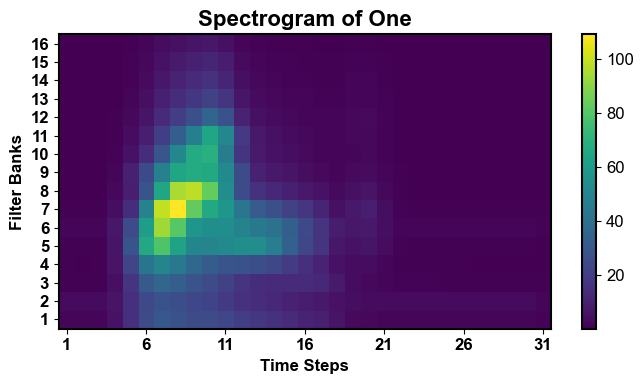

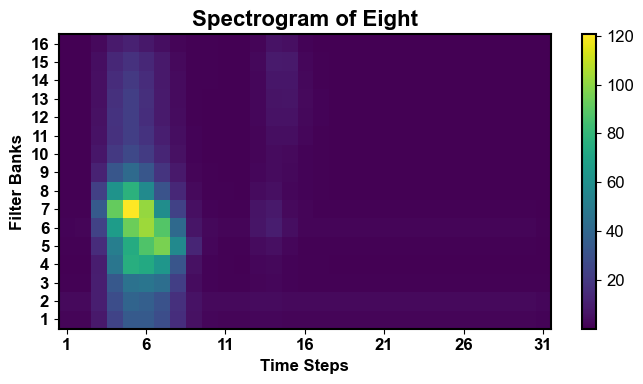

In [45]:
ytick, xtick = spks.shape[2:]

plt.figure(figsize=(7, 4))
plt.imshow(spks[0,0].cpu().numpy(), aspect='auto', origin='lower')
plt.xlabel('Time Steps', fontsize=12, weight='bold')
plt.ylabel('Filter Banks', fontsize=12, weight='bold')
plt.title('Spectrogram of One', fontsize=16, weight='bold')
plt.xticks(range(0, xtick, 5), range(1, xtick+1, 5), fontsize=12, weight='bold')
plt.yticks(range(ytick), range(1, ytick+1), fontsize=12, weight='bold')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.imshow(spks[1,0].cpu().numpy(), aspect='auto', origin='lower')
plt.xlabel('Time Steps', fontsize=12, weight='bold')
plt.ylabel('Filter Banks', fontsize=12, weight='bold')
plt.title('Spectrogram of Eight', fontsize=16, weight='bold')
plt.xticks(range(0, xtick, 5), range(1, xtick+1, 5), fontsize=12, weight='bold')
plt.yticks(range(ytick), range(1, ytick+1), fontsize=12, weight='bold')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#### [Back to List of Content](#list_of_content)

<hr style="border:2px solid grey">

## Results and Discussion

This is the first reported learnable analog front-end with circuit-algorithm co-design for audio acquisition and this work has been accepted into publication in DAC 2024 [[9]](#ref9) . However, this notebook include several modifications beyond [[9]](#ref9):
- Use of filterbank's current (I) ratio instead of using $g_m$ directly for better reconfigurability as the current outside the chip can be changed and not the $g_m$
- Setting $\lambda_{I} \neq \lambda_{C}$ to enable better appreciation for the tunability for either power or area
- Use of hyperparameter tuning to obtain hyperparameters

The following table shows the comparison between fixed and learnable AFE on hardware resource utilization and KWS accuracy. For a fixed AFE, $\phi_I$, $\phi_C$, and $Q$ are same across 16 channels, while learnable AFE shows non-uniform gains and Q-factor across the 16 channels. Through circuit-algorithm co-design, The presented architecture achieves notable reductions of 8.7% and 12.9% in DSSF-BPF power and area consumption, respectively, while maintaining outstanding classification accuracy ranging from 89.4% to 92.4% under 5 dB to 20 dB SNR. 

\begin{array}{|c|c|c|}
\hline
  & Fixed \ AFE & Learnable \ AFE\\
\hline
\phi_I & 3.0 & 1.7 - 2.8 \\
\hline
\phi_C & 7.36 & 3.0 - 7.3\\
\hline
Q & 4.78 & 1.7 - 4.5 \\
\hline
Power \ (nW) & 96.4 & 88.0 \\
\hline
Capacitor \ Area \ (mm^2) & 0.0653 & 0.0569 \\
\hline
Learning \ Method & Freeze \ AFE + Train \ DSCNN & Train \ AFE \ \& \ DSCNN\\
\hline
Accuracy \ @ \ 5 \ dB \ SNR & 82.7 & 89.4 \\
\hline
Accuracy \ @ \ 20 \ dB \ SNR & 89.1 & 92.4 \\
\hline
\end{array}

<hr style="border:2px solid grey">

## Conclusion

In conclusion, a learnable audio AFE with a DSCNN optimizes DSSF-BPF for always-on KWS is presented.

The incorporation of adaptive scaling strategies, a comprehensive equivalent circuit analysis, and a novel co-design optimization criterion function showcases a holistic framework for achieving superior KWS performance and efficient hardware resource utilization. This work bridges analog circuit design and machine learning, presenting a compelling solution for energy-efficient, compact, and accurate always-on KWS systems in mobile and IoT devices. This approach highlights the significance of our BPF in enhancing system performance through fine-tuned parameter optimization, ensuring our LearnAFE project achieves exceptional classification accuracy with minimal power and area consumption.

<hr style="border:2px solid grey">

## References

[1]<a id="ref1"></a> J. S. P. Giraldo et al., “18μW SoC for near-microphone keyword spotting and speaker verification,” in Proc. IEEE Symp. VLSI Circuits, Jun. 2019, pp. C52-C53.

[2]<a id="ref2"></a> S.Ray and P. R. Kinget, “A 31-Feature, 80nW, 0.53mm2 audio analog feature extractor based on time-mode analog filterbank interpolation and time-mode analog rectification,” in Proc. IEEE Symp. VLSI Circuits, Jun. 2022, pp. 184-185.

[3]<a id="ref3"></a> N. Zeghidour et al., “LEAF: A learnable frontend for audio classification,” in Int. Conf. Learn. Represent. (ICLR), 2020.

[4]<a id="ref4"></a> I. López-Espejo, et al., "Filterbank Learning for Noise-Robust Small-Footprint Keyword Spotting," in Proc. IEEE Int. Conf. Acoust. Speech, Signal Process. (ICASSP), Jun. 2023, pp. 1-5.

[5]<a id="ref5"></a>  SkyWater SKY130 PDK. available online at https://github.com/google/skywater-pdk.

[6]<a id="ref6"></a>  Ngspice Circuit Simulator, avalable online at: http://www.ngspice.org.

[7]<a id="ref7"></a> Bakshy E, et al., "AE: A domain-agnostic platform for adaptive experimentation," in Proc. Conf. Neural Inf. Process. Syst. (NeuraIPS), Dec. 2018, pp. 1-8.

[8]<a id="ref8"></a> Kegl B., "A systematic study comparing hyperparameter optimization engines on tabular data," in arXiv preprint, Nov. 2023.

[9]<a id="ref9"></a> J. Hu, Z. Zhang, C. S. Leow, W. L. Goh, and Y. Gao, “Late Breaking Results: Circuit-Algorithm Co-design for Learnable Audio Analog Front-End,” in 61st ACM/IEEE Design Automation Conf. (DAC), accepted, 2024.